In [1]:
python demo.py --in-path dataloaders/datasets/arab/JPEGImages --ckpt run/arab/deeplab-resnet/model_best.pth.tar --backbone resnet 

SyntaxError: invalid syntax (<ipython-input-1-6c3d6e7098fa>, line 1)

In [2]:
#
# demo.py
#
import argparse
import os
import numpy as np
import time

from modeling.deeplab import *
from dataloaders import custom_transforms as tr
from PIL import Image
from torchvision import transforms
from dataloaders.utils import  *
from torchvision.utils import make_grid, save_image
import matplotlib.gridspec as gridspec

In [3]:
model_s_time = time.time()
model = DeepLab(num_classes=4,
                backbone='drn',
                output_stride=16,
                sync_bn=None,
                freeze_bn=False)

In [7]:
# model_path = "run/arab3/deeplab-resnet/model_best.pth.tar" 
model_path = "run/arab3/deeplab-drn/model_best_6816.pth.tar" 
ckpt = torch.load(model_path, map_location='cpu')
model.load_state_dict(ckpt['state_dict'])
model = model.cuda()
model_u_time = time.time()
model_load_time = model_u_time-model_s_time
print("model load time is {}".format(model_load_time))

model load time is 1564.0989394187927


image:exp18_338-2_W_60.22_2_2021-1-12.png time: 0.5929744243621826 


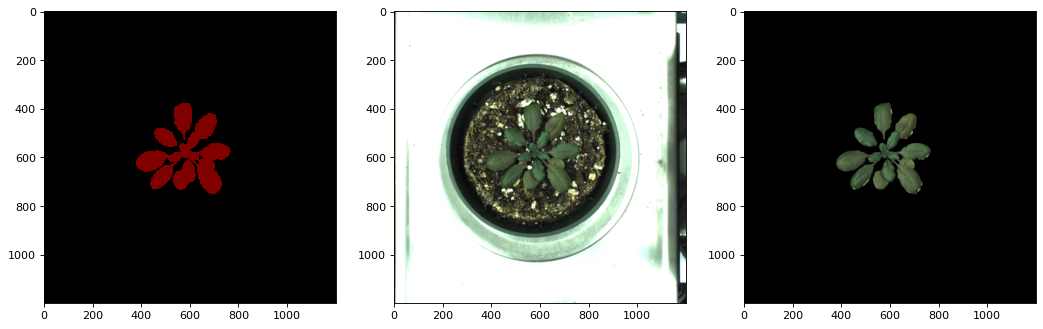

In [8]:
import random

image_path = "/media/lietang/easystore/RoAD/exp12/2019-10-10/abi5-1_W_79.99_1/"
image_path = "/home/lietang/Documents/RoAD/pytorch-deeplab-xception/dataloaders/datasets/arab/testImages/"
image_path = "/home/lietang/Documents/RoAD/pytorch-deeplab-xception/dataloaders/datasets/arab3/JPEGImages/"

fig = plt.figure(figsize=(16, 12), dpi=80)

composed_transforms = transforms.Compose([
    tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    tr.ToTensor()])
for name in os.listdir(image_path):
    name=random.choice(os.listdir(image_path))
#     if (name[-3:]) != "bmp":
#         continue
#     name = "CMS35-3_W_62.16_1_2020-10-18.bmp"
    s_time = time.time()
    image = Image.open(image_path+"/"+name).convert('RGB')

    # image = Image.open(args.in_path).convert('RGB')
    target = Image.open(image_path+"/"+name).convert('L')
    sample = {'image': image, 'label': target}
    tensor_in = composed_transforms(sample)['image'].unsqueeze(0)

    model.eval()
    if 1: #args.cuda:
        tensor_in = tensor_in.cuda()
    with torch.no_grad():
        output = model(tensor_in)

    grid_image = make_grid(decode_seg_map_sequence(torch.max(output[:3], 1)[1].detach().cpu().numpy()),
                            3, normalize=False, range=(0, 255))
#     save_image(grid_image,args.in_path+"/../predictmask/"+"{}_mask.png".format(name[0:-4]))
    
    u_time = time.time()
    img_time = u_time-s_time
    print("image:{} time: {} ".format(name,img_time))
    
    npgrid = grid_image.cpu().numpy()
    plt.subplot(1, 3, 1)
    plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
    
    
    save_image(grid_image,"mask.png")
    mask = Image.open("mask.png").convert('L')
    mask = np.array(mask)
    img = np.array(image)
    img[np.where(mask==0)] = [0, 0, 0] #255, 255, 255
    
    plt.subplot(1, 3, 2)
    plt.imshow(image)
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    break

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174288.3418636322 
unique:  [  0  38 113]
plant:  4514
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174289.81728196144 
unique:  [  0  38 113]


/home/lietang/anaconda3/envs/deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/lietang/anaconda3/envs/deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/lietang/anaconda3/envs/deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments a

plant:  5687
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174291.2488641739 
unique:  [  0  38 113]
plant:  7195
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174292.71530222893 
unique:  [  0  38 113]
plant:  9154
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174294.16745352745 
unique:  [  0  38  75 113]
plant:  11757
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174295.6405904293 
unique:  [  0  38 113]
plant:  14887
/media/lietang/eas

/home/lietang/anaconda3/envs/deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174327.86712527275 
unique:  [  0  38 113]
plant:  64716
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174329.48050832748 
unique:  [  0  38 113]
plant:  62431
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174331.17684292793 
unique:  [  0  38 113]
plant:  61523
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp time: 174332.83710956573 
unique:  [  0  38  75 113]
plant:  61093
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_H_131.08_1/COMP-1_H_131.08_1.bmp
image:/media/lietang/easystore1/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174382.59830713272 
unique:  [ 0 38]
plant:  37970
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174384.2228527069 
unique:  [ 0 38]
plant:  42978
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174385.73455429077 
unique:  [ 0 38]
plant:  44974
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174387.32307696342 
unique:  [ 0 38]
plant:  49075
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/

plant:  54498
/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174438.7769408226 
unique:  [  0  38 113]
plant:  53318
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174440.42059135437 
unique:  [  0  38 113]
plant:  52341
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174442.17050480843 
unique:  [  0  38 113]
plant:  52157
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_H_131.08_2/COMP-1_H_131.08_2.bmp time: 174443.8449807167 
unique:  [  0  38 113]
plant:  51652
/media/lietang/e

image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174496.45668768883 
unique:  [  0  38 113]
plant:  45701
/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174498.22103595734 
unique:  [  0  38 113]
plant:  45687
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174500.0207719803 
unique:  [  0  38 113]
plant:  46143
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174501.8522746563 
unique:  [  0  38 113]
plant:  44823
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/e

/home/lietang/anaconda3/envs/deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174520.07818937302 
unique:  [  0  38  75 113]
plant:  36987
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174521.84041643143 
unique:  [  0  38  75 113]
plant:  36754
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174523.66510391235 
unique:  [  0  38  75 113]
plant:  36259
/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/COMP-1_H_131.08_3/COMP-1_H_131.08_3.bmp time: 174525.36043334007 
unique:  [  0  38 113]
plant:  36016
/media/lietang/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp time: 174579.13652944565 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp time: 174580.68099927902 
unique:  [ 0 38]
plant:  21883
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp time: 174582.27714037895 
unique:  [ 0 38]
plant:  22572
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp time: 174583.87448573112 
unique:  [ 0 38]
plant:  23027
/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-1_H_131.08_4/COMP-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/COMP-1_H_131.08_4/COMP

image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174635.48083758354 
unique:  [ 0 38]
plant:  10807
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174637.0443263054 
unique:  [ 0 38]
plant:  13457
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174638.69072675705 
unique:  [ 0 38]
plant:  16419
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174640.27367043495 
unique:  [ 0 38]
plant:  19034
/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/

unique:  [ 0 38]
plant:  214448
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174695.60643529892 
unique:  [ 0 38]
plant:  223467
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174697.23135757446 
unique:  [ 0 38]
plant:  231900
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174698.93372631073 
unique:  [  0  38 113]
plant:  238828
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_W_131.08_1/COMP-1_W_131.08_1.bmp time: 174700.6729259491 
unique:  [ 0 38 75]
plant:  246085
/media/l

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp time: 174754.54921650887 
unique:  [ 0 38]
plant:  138602
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp time: 174756.2650232315 
unique:  [ 0 38]
plant:  173314
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp time: 174757.85613369942 
unique:  [ 0 38]
plant:  187598
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp time: 174760.07415294647 
unique:  [ 0 38]
plant:  191049
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_131.08_2/COMP-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2

unique:  [ 0 38]
plant:  6754
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174816.75140166283 
unique:  [ 0 38]
plant:  8538
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174818.9714155197 
unique:  [ 0 38]
plant:  10659
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174820.6884124279 
unique:  [ 0 38]
plant:  12776
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174822.40294837952 
unique:  [ 0 38]
plant:  14072
/media/lietang/easystore1/

unique:  [ 0 38]
plant:  156147
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174888.02237796783 
unique:  [ 0 38]
plant:  156446
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174889.7253870964 
unique:  [ 0 38]
plant:  156985
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174895.63618183136 
unique:  [ 0 38]
plant:  157478
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_W_131.08_3/COMP-1_W_131.08_3.bmp time: 174897.40545845032 
unique:  [ 0 38]
plant:  159453
/media/lietang/ea

unique:  [ 0 38]
plant:  119616
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp time: 174954.02962470055 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp time: 174955.56237387657 
unique:  [ 0 38]
plant:  147627
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp time: 174957.41191720963 
unique:  [ 0 38]
plant:  151395
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-1_W_131.08_4/COMP-1_W_131.08_4.bmp time: 174959.05766296387 
unique:  [ 0 38]
plant:  156316
/media/lietang/easystore1/RoAD/exp20/2

plant:  6891
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175034.40194296837 
unique:  [ 0 38]
plant:  8616
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175036.11857271194 
unique:  [ 0 38]
plant:  10435
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175037.91418290138 
unique:  [ 0 38]
plant:  13275
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175039.5915658474 
unique:  [ 0 38]
plant:  15200
/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_55

/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175095.42462062836 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175097.26462626457 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175099.11395168304 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp time: 175100.8227341175 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-1_W_55.91_1/COMP-1_W_55.91_1.bmp
imag

unique:  [ 0 38]
plant:  117341
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp time: 175166.92221689224 
unique:  [ 0 38]
plant:  115437
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp time: 175168.5320403576 
unique:  [ 0 38]
plant:  108941
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp time: 175170.20426630974 
unique:  [ 0 38]
plant:  107849
/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/COMP-1_W_55.91_2/COMP-1_W_55.91_2.bmp time: 175172.07069468498 
unique:  [ 0 38]
plant:  108538
/media/lietang/easystore1/RoAD/exp20/2

plant:  573
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175250.81578969955 
unique:  [ 0 38]
plant:  424
/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175252.44784545898 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-7-14/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175253.93999648094 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175255.4508650303 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lie

image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175308.44354319572 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175309.91792559624 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175311.384213686 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175312.89069652557 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_W_55.91_3/COMP-1_W_55.91_3.bmp time: 175314.3792734146

image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp time: 175366.86544013023 
unique:  [ 0 38]
plant:  104601
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp time: 175368.5708642006 
unique:  [ 0 38]
plant:  105153
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp time: 175370.2671175003 
unique:  [ 0 38]
plant:  106805
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp time: 175371.88804769516 
unique:  [ 0 38]
plant:  107945
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_55.91_4/COMP-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-1_W_55.91_4/COMP-

unique:  [ 0 38]
plant:  30026
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175430.19671845436 
unique:  [ 0 38]
plant:  38087
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175431.88056635857 
unique:  [ 0 38]
plant:  44102
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175433.53659629822 
unique:  [ 0 38]
plant:  51483
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175435.20154500008 
unique:  [ 0 38]
plant:  57649
/media/lietang/easystore1/RoAD/exp20/

unique:  [  0  38  75 113]
plant:  156559
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175492.9350092411 
unique:  [  0  38  75 113]
plant:  163899
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175494.9060573578 
unique:  [  0  38  75 113]
plant:  181183
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175496.9009141922 
unique:  [  0  38  75 113]
plant:  188608
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-1_W_63.42_1/COMP-1_W_63.42_1.bmp time: 175498.91459298134 
unique:  [  0  38  75 113]


unique:  [ 0 38]
plant:  116008
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp time: 175554.4128460884 
unique:  [ 0 38]
plant:  115997
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp time: 175556.2342941761 
unique:  [ 0 38]
plant:  116043
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp time: 175557.90168261528 
unique:  [ 0 38]
plant:  117502
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-1_W_63.42_2/COMP-1_W_63.42_2.bmp time: 175559.61493492126 
unique:  [ 0 38]
plant:  117655
/media/lietang/easystore1/RoAD/exp20/2021-

image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175616.67754554749 
unique:  [ 0 38]
plant:  36521
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175618.42300724983 
unique:  [ 0 38]
plant:  41454
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175620.05346226692 
unique:  [ 0 38]
plant:  49488
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175621.67895007133 
unique:  [ 0 38]
plant:  53268
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-1_W_63.42_

image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175680.05955195427 
unique:  [  0  38  75 113]
plant:  152032
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175681.89129185677 
unique:  [ 0 38]
plant:  164706
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175683.75103259087 
unique:  [ 0 38]
plant:  171090
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp time: 175685.51443862915 
unique:  [ 0 38]
plant:  176005
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-1_W_63.42_3/COMP-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/C

unique:  [ 0 38 75]
plant:  101474
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp time: 175742.85095238686 
unique:  [ 0 38]
plant:  96040
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp time: 175744.55389285088 
unique:  [ 0 38]
plant:  97697
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp time: 175746.3317182064 
unique:  [ 0 38]
plant:  98604
/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-1_W_63.42_4/COMP-1_W_63.42_4.bmp time: 175748.07980799675 
unique:  [ 0 38]
plant:  97064
/media/lietang/easystore1/RoAD/exp20/2021

unique:  [ 0 38]
plant:  24229
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175804.5837981701 
unique:  [  0  38 113]
plant:  27650
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175806.29948282242 
unique:  [ 0 38]
plant:  32432
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175807.8851017952 
unique:  [ 0 38]
plant:  35917
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175809.5035636425 
unique:  [ 0 38]
plant:  38251
/media/lietang/eas

image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175865.28422951698 
unique:  [  0  38  75 113]
plant:  45982
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175867.1503071785 
unique:  [  0  38  75 113]
plant:  44291
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175868.96335434914 
unique:  [  0  38  75 113]
plant:  43065
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp time: 175870.81749796867 
unique:  [  0  38  75 113]
plant:  42906
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_H_131.08_1/COMP-2_H_131.08_1.bmp
image:/media/

plant:  40325
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp time: 175926.01014852524 
unique:  [  0  38 113]
plant:  40270
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp time: 175927.83853149414 
unique:  [  0  38 113]
plant:  39899
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp time: 175929.59657788277 
unique:  [  0  38 113]
plant:  39918
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-2_H_131.08_2/COMP-2_H_131.08_2.bmp time: 175931.67639112473 
unique:  [  0  38 113]
plant:  39566
/media/lietang/easysto

image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 175985.76657676697 
unique:  [ 0 38]
plant:  22214
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 175987.38437843323 
unique:  [ 0 38 75]
plant:  24893
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 175989.22215032578 
unique:  [ 0 38]
plant:  27018
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 175990.86228775978 
unique:  [ 0 38]
plant:  29507
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7

unique:  [  0  38 113]
plant:  31167
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 176055.56886816025 
unique:  [  0  38 113]
plant:  30487
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 176057.3251633644 
unique:  [  0  38 113]
plant:  30547
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 176059.1763253212 
unique:  [  0  38  75 113]
plant:  29790
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_H_131.08_3/COMP-2_H_131.08_3.bmp time: 176060.90442204475 
unique:  [  0  38 113]
pla

image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp time: 176113.67218589783 
unique:  [  0  38 113]
plant:  22593
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp time: 176115.2868077755 
unique:  [  0  38 113]
plant:  22362
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp time: 176116.9748609066 
unique:  [  0  38 113]
plant:  22068
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp time: 176118.6321542263 
unique:  [  0  38 113]
plant:  21708
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_H_131.08_4/COMP-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/ex

plant:  22617
/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176173.39061760902 
unique:  [ 0 38]
plant:  27894
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176175.06141853333 
unique:  [ 0 38]
plant:  32668
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176176.75418376923 
unique:  [ 0 38]
plant:  38676
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176178.43417716026 
unique:  [ 0 38]
plant:  47246
/media/lietang/easystore1/RoAD/exp20/2

unique:  [ 0 38]
plant:  207419
/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176235.3963599205 
unique:  [ 0 38]
plant:  207683
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176237.2213203907 
unique:  [ 0 38]
plant:  208282
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176239.05442738533 
unique:  [  0  38 113]
plant:  213143
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_131.08_1/COMP-2_W_131.08_1.bmp time: 176240.8438065052 
unique:  [  0  38 113]
plant:  214479
/media/

image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp time: 176296.69209718704 
unique:  [ 0 38]
plant:  215745
/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp time: 176298.43026280403 
unique:  [ 0 38]
plant:  218496
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp time: 176300.3187816143 
unique:  [ 0 38]
plant:  218687
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp time: 176302.17004704475 
unique:  [ 0 38]
plant:  218538
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_131.08_2/COMP-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-

image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176359.0674636364 
unique:  [ 0 38]
plant:  33969
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176360.79140019417 
unique:  [ 0 38]
plant:  40786
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176362.48831367493 
unique:  [ 0 38]
plant:  47924
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176364.14322900772 
unique:  [ 0 38]
plant:  55221
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/

unique:  [  0  38 113]
plant:  244093
/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176420.27950119972 
unique:  [  0  38 113]
plant:  244340
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176422.311098814 
unique:  [  0  38 113]
plant:  245167
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176424.37376570702 
unique:  [  0  38 113]
plant:  248747
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_131.08_3/COMP-2_W_131.08_3.bmp time: 176426.47949934006 
unique:  [  0  38 113]
pla

image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp time: 176482.2628364563 
unique:  [ 0 38]
plant:  163411
/media/lietang/easystore1/RoAD/exp20/2021-8-4/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp time: 176484.1057972908 
unique:  [ 0 38]
plant:  168603
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp time: 176486.0092587471 
unique:  [ 0 38]
plant:  172335
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp time: 176487.76302957535 
unique:  [ 0 38]
plant:  176349
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_131.08_4/COMP-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176543.82753038406 
unique:  [ 0 38]
plant:  31143
/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176545.60388088226 
unique:  [ 0 38]
plant:  37508
/media/lietang/easystore1/RoAD/exp20/2021-7-16/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176547.34584450722 
unique:  [ 0 38]
plant:  45145
/media/lietang/easystore1/RoAD/exp20/2021-7-17/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176549.0905008316 
unique:  [ 0 38]
plant:  52942
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_55.91_1

unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176629.9202618599 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176631.7034687996 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176633.42664122581 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_55.91_1/COMP-2_W_55.91_1.bmp time: 176635.11939048767 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_55.91_1/COMP-2_W_55.91_

unique:  [ 0 38]
plant:  122418
/media/lietang/easystore1/RoAD/exp20/2021-8-5/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp time: 176693.2326951027 
unique:  [ 0 38]
plant:  124798
/media/lietang/easystore1/RoAD/exp20/2021-8-6/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp time: 176695.06916117668 
unique:  [ 0 38]
plant:  126150
/media/lietang/easystore1/RoAD/exp20/2021-8-7/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp time: 176696.89420366287 
unique:  [ 0 38]
plant:  128588
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-2_W_55.91_2/COMP-2_W_55.91_2.bmp time: 176698.76282715797 
unique:  [ 0 38]
plant:  129785
/media/lietang/easystore1/RoAD/exp20/2021

plant:  28997
/media/lietang/easystore1/RoAD/exp20/2021-7-18/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176756.30595350266 
unique:  [ 0 38]
plant:  31131
/media/lietang/easystore1/RoAD/exp20/2021-7-19/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176758.07618308067 
unique:  [ 0 38]
plant:  34090
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176760.02903962135 
unique:  [ 0 38]
plant:  39435
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176761.9424176216 
unique:  [ 0 38]
plant:  45640
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W

image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176819.23090577126 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176820.9075767994 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176822.6402413845 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp time: 176824.32553625107 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-2_W_55.91_3/COMP-2_W_55.91_3.bmp ti

plant:  102602
/media/lietang/easystore1/RoAD/exp20/2021-8-8/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp time: 176881.20916104317 
unique:  [ 0 38]
plant:  101374
/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp time: 176882.96024250984 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp time: 176884.64792656898 
unique:  [ 0 38 75]
plant:  21792
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_55.91_4/COMP-2_W_55.91_4.bmp time: 176886.64063501358 
unique:  [ 0 38 75]
plant:  13032
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_55.91_4/COM

unique:  [ 0 38 75]
plant:  68723
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 176953.9792189598 
unique:  [ 0 38 75]
plant:  76872
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 176955.76232528687 
unique:  [ 0 38]
plant:  85283
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 176957.416659832 
unique:  [ 0 38 75]
plant:  93569
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 176958.99474287033 
unique:  [ 0 38]
plant:  100656
/media/lietang/easystore1/RoAD

image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 177016.6570470333 
unique:  [  0  38 113]
plant:  168930
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 177018.5145125389 
unique:  [  0  38 113]
plant:  171418
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 177020.31498408318 
unique:  [  0  38  75 113]
plant:  172290
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp time: 177022.1114704609 
unique:  [  0  38 113]
plant:  174679
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-2_W_63.42_1/COMP-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/

plant:  142722
/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp time: 177078.21480059624 
unique:  [ 0 38]
plant:  140651
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp time: 177079.85777401924 
unique:  [ 0 38]
plant:  123904
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp time: 177081.51244020462 
unique:  [  0  38  75 113]
plant:  82075
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-2_W_63.42_2/COMP-2_W_63.42_2.bmp time: 177083.46010446548 
unique:  [  0  38  75 113]
plant:  129965
/media/lietang/easystore1/RoAD/

plant:  56689
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp time: 177138.80560946465 
unique:  [ 0 38]
plant:  61450
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp time: 177140.52322340012 
unique:  [ 0 38]
plant:  68125
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp time: 177142.15279650688 
unique:  [ 0 38]
plant:  76371
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp time: 177143.85169792175 
unique:  [ 0 38]
plant:  83916
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-2_

/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp time: 177202.36160731316 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-2_W_63.42_3/COMP-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177204.07357740402 
unique:  [ 0 38]
plant:  7667
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177205.78400588036 
unique:  [ 0 38]
plant:  9369
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177207.39639616013 
unique:  [ 0 38]
plant:  10476
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
im

image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177263.29788136482 
unique:  [  0  38  75 113]
plant:  21723
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177265.04385066032 
unique:  [  0  38  75 113]
plant:  84783
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177266.94556307793 
unique:  [  0  38  75 113]
plant:  91448
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp time: 177268.9366130829 
unique:  [  0  38  75 113]
plant:  97096
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-2_W_63.42_4/COMP-2_W_63.42_4.bmp
image:/media/lietang/easystor

unique:  [ 0 38]
plant:  73168
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177349.94252371788 
unique:  [ 0 38]
plant:  78493
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177351.69515061378 
unique:  [ 0 38]
plant:  83502
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177353.39087963104 
unique:  [ 0 38]
plant:  86081
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177354.93299865723 
unique:  [ 0 38]
plant:  88643
/media/lietang/easyst

unique:  [  0  38  75 113]
plant:  65187
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177414.4734866619 
unique:  [  0  38  75 113]
plant:  66010
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp time: 177416.41839838028 
unique:  [  0  38  75 113]
plant:  65432
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_H_131.08_1/COMP-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177418.43177175522 
unique:  [ 0 38]
plant:  6836
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177420.11690473557 
unique:  [ 0 38]
plant:  8511
/

image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177474.50907707214 
unique:  [  0  38 113]
plant:  55302
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177476.36955213547 
unique:  [  0  38 113]
plant:  54192
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177478.14548659325 
unique:  [  0  38 113]
plant:  53414
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp time: 177479.99458551407 
unique:  [  0  38 113]
plant:  53330
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_H_131.08_2/COMP-3_H_131.08_2.bmp
image:/media/lietang/easysto

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177536.30797457695 
unique:  [  0  38 113]
plant:  1159
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177538.07494211197 
unique:  [  0  38 113]
plant:  872
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177539.760430336 
unique:  [  0  38 113]
plant:  495
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177541.53347826004 
unique:  [  0  38  75 113]
plant:  213
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/R

image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177597.3383796215 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp time: 177598.95997691154 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_H_131.08_3/COMP-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177600.4357779026 
unique:  [ 0 38]
plant:  4612
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177602.0500946045 
unique:  [ 0 38]
plant:  6122
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_H_131.08_4/COMP-3_H_131.08_4

image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177656.85376119614 
unique:  [ 0 38]
plant:  24133
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177658.6689939499 
unique:  [ 0 38]
plant:  23910
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177660.43269348145 
unique:  [  0  38 113]
plant:  23517
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp time: 177662.1001036167 
unique:  [ 0 38]
plant:  23203
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_H_131.08_4/COMP-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-

unique:  [ 0 38]
plant:  56297
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177719.2372250557 
unique:  [ 0 38]
plant:  65601
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177720.99593615532 
unique:  [ 0 38]
plant:  74617
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177722.81868195534 
unique:  [ 0 38]
plant:  86205
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177724.58765268326 
unique:  [ 0 38]
plant:  87447
/media/lietang/easysto

image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177781.8775999546 
unique:  [  0  38 113]
plant:  332086
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177783.78235173225 
unique:  [  0  38 113]
plant:  330769
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp time: 177786.50118350983 
unique:  [  0  38 113]
plant:  330113
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_131.08_1/COMP-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp time: 177788.46430540085 
unique:  [ 0 38]
plant:  3371
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/ex

image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp time: 177844.7646329403 
unique:  [ 0 38]
plant:  181301
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp time: 177846.55947589874 
unique:  [ 0 38]
plant:  181656
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp time: 177849.02928853035 
unique:  [  0  38 113]
plant:  182919
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp time: 177851.0070297718 
unique:  [  0  38 113]
plant:  185420
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_131.08_2/COMP-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177917.58264899254 
unique:  [  0  38 113]
plant:  55240
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177919.33340072632 
unique:  [ 0 38]
plant:  62202
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177921.10796260834 
unique:  [ 0 38]
plant:  69528
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177922.8354074955 
unique:  [ 0 38]
plant:  77545
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021

unique:  [ 0 38]
plant:  275226
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177984.1948211193 
unique:  [ 0 38]
plant:  278246
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177986.09447717667 
unique:  [ 0 38]
plant:  279924
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp time: 177987.97630143166 
unique:  [ 0 38]
plant:  281186
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_131.08_3/COMP-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp time: 177989.7726354599 
unique:  [ 0 38]
plant:  4139
/media/lietang/easystore1

unique:  [  0  38  75 113]
plant:  156260
/media/lietang/easystore1/RoAD/exp20/2021-8-9/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp time: 178060.0132985115 
unique:  [  0  38  75 113]
plant:  157534
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp time: 178061.85373950005 
unique:  [  0  38  75 113]
plant:  158340
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp time: 178063.72339963913 
unique:  [  0  38 113]
plant:  159381
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_131.08_4/COMP-3_W_131.08_4.bmp time: 178065.5930736065 
unique:  [  0  

image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178121.92585659027 
unique:  [ 0 38]
plant:  74244
/media/lietang/easystore1/RoAD/exp20/2021-7-20/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178123.67405486107 
unique:  [ 0 38]
plant:  83834
/media/lietang/easystore1/RoAD/exp20/2021-7-21/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178125.40038990974 
unique:  [ 0 38]
plant:  93068
/media/lietang/easystore1/RoAD/exp20/2021-7-22/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178127.10260367393 
unique:  [ 0 38]
plant:  105857
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_55.91

unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178188.1746585369 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178189.88489818573 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp time: 178191.62588620186 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_55.91_1/COMP-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp time: 178193.21349215508 
unique:  [ 0 38]
plant:  4879
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_55.91_2/COMP-3_W_55.9

image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp time: 178248.93971157074 
unique:  [ 0 38 75]
plant:  89608
/media/lietang/easystore1/RoAD/exp20/2021-8-10/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp time: 178250.75986242294 
unique:  [ 0 38 75]
plant:  13263
/media/lietang/easystore1/RoAD/exp20/2021-8-11/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp time: 178252.56428670883 
unique:  [ 0 38 75]
plant:  3186
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp time: 178254.42524409294 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_55.91_2/COMP-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_55

image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp time: 178312.67415642738 
unique:  [ 0 38]
plant:  43776
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp time: 178314.3943490982 
unique:  [ 0 38]
plant:  48942
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp time: 178316.08632707596 
unique:  [ 0 38]
plant:  54259
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp time: 178317.781011343 
unique:  [ 0 38]
plant:  64297
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-3_W_55.91_3/C

unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/COMP-3_W_55.91_3/COMP-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178378.6590242386 
unique:  [ 0 38]
plant:  4739
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178380.26980614662 
unique:  [ 0 38]
plant:  6247
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178381.94531989098 
unique:  [ 0 38]
plant:  7628
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178383.56287503242 
unique:  [ 0 38]
plant:  10108
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-

image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178438.71188259125 
unique:  [  0  38  75 113]
plant:  3078
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178440.5945265293 
unique:  [  0  38  75 113]
plant:  24506
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178442.60765862465 
unique:  [  0  38  75 113]
plant:  10639
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp time: 178444.57503557205 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_55.91_4/COMP-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2

unique:  [ 0 38]
plant:  94630
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp time: 178502.09695196152 
unique:  [ 0 38]
plant:  97588
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp time: 178503.92749285698 
unique:  [ 0 38]
plant:  109925
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp time: 178505.71559286118 
unique:  [ 0 38]
plant:  112994
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-3_W_63.42_1/COMP-3_W_63.42_1.bmp time: 178507.46577215195 
unique:  [ 0 38]
plant:  113645
/media/lietang/easystore1/RoAD/exp

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178567.99357891083 
unique:  [ 0 38]
plant:  5395
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178569.64112329483 
unique:  [ 0 38]
plant:  7360
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178571.34525990486 
unique:  [ 0 38]
plant:  9736
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178573.16664958 
unique:  [ 0 38]
plant:  12529
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-3_W_63.42_2/COMP-3_W_6

unique:  [  0  38  75 113]
plant:  127967
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178631.92755150795 
unique:  [  0  38  75 113]
plant:  128283
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178633.92525577545 
unique:  [  0  38  75 113]
plant:  130245
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178635.98404884338 
unique:  [  0  38  75 113]
plant:  132808
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-3_W_63.42_2/COMP-3_W_63.42_2.bmp time: 178637.94251799583 
unique:  [  0  38  75 11

image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp time: 178694.8442249298 
unique:  [ 0 38]
plant:  72135
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp time: 178696.55975055695 
unique:  [ 0 38]
plant:  86133
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp time: 178698.3867211342 
unique:  [ 0 38]
plant:  94988
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp time: 178700.10105085373 
unique:  [ 0 38]
plant:  102535
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-3_W_63.42_3/COMP-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-3_W_63.42_3

plant:  3971
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178761.24818444252 
unique:  [ 0 38]
plant:  5039
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178762.87002801895 
unique:  [ 0 38]
plant:  6483
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178764.65512275696 
unique:  [ 0 38]
plant:  7970
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178766.3816587925 
unique:  [ 0 38]
plant:  9869
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-3_W_63.42_4/C

image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178823.441498518 
unique:  [ 0 38]
plant:  117416
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178825.16506838799 
unique:  [ 0 38]
plant:  122068
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178826.8909986019 
unique:  [ 0 38]
plant:  124917
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp time: 178828.59372067451 
unique:  [ 0 38]
plant:  127045
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-3_W_63.42_4/COMP-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-3_W_63.42

image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp time: 178885.53642225266 
unique:  [ 0 38]
plant:  56276
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp time: 178887.24968028069 
unique:  [ 0 38]
plant:  58586
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp time: 178889.01391291618 
unique:  [ 0 38]
plant:  59821
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp time: 178890.67408776283 
unique:  [ 0 38]
plant:  63147
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_H_131.08_1/COMP-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 178960.0072426796 
unique:  [ 0 38]
plant:  6832
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 178961.71795654297 
unique:  [ 0 38]
plant:  8635
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 178963.38388061523 
unique:  [ 0 38]
plant:  10858
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 178965.16238379478 
unique:  [ 0 38]
plant:  13456
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_H

image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 179031.0082564354 
unique:  [ 0 38 75]
plant:  44644
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 179032.7223584652 
unique:  [  0  38  75 113]
plant:  43933
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 179034.50822091103 
unique:  [  0  38  75 113]
plant:  43063
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp time: 179036.3305952549 
unique:  [  0  38  75 113]
plant:  42339
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_H_131.08_2/COMP-4_H_131.08_2.bmp
image:/media/lietang/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp time: 179092.60779619217 
unique:  [ 0 38]
plant:  4382
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp time: 179094.23052048683 
unique:  [ 0 38]
plant:  4422
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp time: 179095.94837212563 
unique:  [ 0 38]
plant:  5094
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp time: 179097.64261865616 
unique:  [ 0 38]
plant:  5177
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_H_131.08_3/COMP-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COM

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179152.1811234951 
unique:  [ 0 38]
plant:  4427
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179153.78791713715 
unique:  [ 0 38]
plant:  5179
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179155.7172679901 
unique:  [ 0 38]
plant:  7125
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179157.43752384186 
unique:  [ 0 38]
plant:  8843
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_13

image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179213.54296946526 
unique:  [ 0 38]
plant:  178978
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179215.3410410881 
unique:  [ 0 38]
plant:  184254
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179217.25812411308 
unique:  [ 0 38]
plant:  194898
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp time: 179219.0708398819 
unique:  [ 0 38]
plant:  202868
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_131.08_2/COMP-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-

plant:  89506
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp time: 179289.82187891006 
unique:  [ 0 38]
plant:  98686
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp time: 179291.72931957245 
unique:  [ 0 38]
plant:  121264
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp time: 179293.59826111794 
unique:  [ 0 38]
plant:  130525
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_W_131.08_3/COMP-4_W_131.08_3.bmp time: 179295.3245151043 
unique:  [ 0 38]
plant:  142995
/media/lietang/easystore1/RoAD/exp20

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179359.07507705688 
unique:  [ 0 38]
plant:  5257
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179360.75052762032 
unique:  [ 0 38]
plant:  6590
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179362.42860722542 
unique:  [ 0 38]
plant:  7507
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179364.10932779312 
unique:  [ 0 38]
plant:  7334
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_

plant:  142517
/media/lietang/easystore1/RoAD/exp20/2021-8-12/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179420.78637170792 
unique:  [  0  38 113]
plant:  145239
/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179422.5109975338 
unique:  [  0  38 113]
plant:  147476
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179424.42798137665 
unique:  [  0  38 113]
plant:  148098
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_131.08_4/COMP-4_W_131.08_4.bmp time: 179426.59439015388 
unique:  [  0  38 113]
plant:  149908
/media/lie

unique:  [ 0 38]
plant:  69732
/media/lietang/easystore1/RoAD/exp20/2021-7-23/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp time: 179484.02514100075 
unique:  [ 0 38]
plant:  78783
/media/lietang/easystore1/RoAD/exp20/2021-7-24/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp time: 179485.63694739342 
unique:  [ 0 38]
plant:  82879
/media/lietang/easystore1/RoAD/exp20/2021-7-25/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp time: 179487.32735943794 
unique:  [ 0 38]
plant:  96440
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_W_55.91_1/COMP-4_W_55.91_1.bmp time: 179489.10529327393 
unique:  [ 0 38]
plant:  101380
/media/lietang/easystore1/RoAD/exp20

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179545.5483019352 
unique:  [ 0 38]
plant:  4382
/media/lietang/easystore1/RoAD/exp20/2021-7-7/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179547.27666902542 
unique:  [ 0 38]
plant:  5720
/media/lietang/easystore1/RoAD/exp20/2021-7-8/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179548.9707148075 
unique:  [ 0 38]
plant:  7223
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179550.6117990017 
unique:  [ 0 38]
plant:  9395
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_55.91_2/COMP-4_W_55

/media/lietang/easystore1/RoAD/exp20/2021-8-14/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179610.1234908104 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179612.01075530052 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179613.9099547863 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp time: 179615.97461557388 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_55.91_2/COMP-4_W_55.91_2.bmp
i

unique:  [ 0 38]
plant:  98096
/media/lietang/easystore1/RoAD/exp20/2021-7-27/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp time: 179679.49413514137 
unique:  [ 0 38]
plant:  105039
/media/lietang/easystore1/RoAD/exp20/2021-7-28/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp time: 179681.1795399189 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp time: 179682.77005147934 
unique:  [ 0 38]
plant:  99808
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-4_W_55.91_4/COMP-4_W_55.91_4.bmp time: 179684.4802377224 
unique:  [ 0 38]
plant:  93690
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-4_W_55

plant:  12467
/media/lietang/easystore1/RoAD/exp20/2021-7-9/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179746.96236491203 
unique:  [ 0 38]
plant:  15414
/media/lietang/easystore1/RoAD/exp20/2021-7-10/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179748.69173932076 
unique:  [ 0 38]
plant:  18154
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179750.37414765358 
unique:  [ 0 38]
plant:  23212
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179752.1626431942 
unique:  [ 0 38]
plant:  28406
/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-4_W_

image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179809.65010142326 
unique:  [  0  38  75 113]
plant:  105260
/media/lietang/easystore1/RoAD/exp20/2021-8-17/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179811.6612560749 
unique:  [  0  38  75 113]
plant:  107168
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179813.66596794128 
unique:  [  0  38  75 113]
plant:  106923
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp time: 179815.72257304192 
unique:  [  0  38 113]
plant:  107243
/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-4_W_63.42_1/COMP-4_W_63.42_1.bmp
image:/media/lietang/easystor

image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp time: 179873.93988013268 
unique:  [ 0 38]
plant:  109399
/media/lietang/easystore1/RoAD/exp20/2021-7-30/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp time: 179875.68061709404 
unique:  [ 0 38]
plant:  114287
/media/lietang/easystore1/RoAD/exp20/2021-7-31/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp time: 179877.45851874352 
unique:  [ 0 38]
plant:  116141
/media/lietang/easystore1/RoAD/exp20/2021-8-1/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp time: 179879.32434988022 
unique:  [ 0 38]
plant:  120036
/media/lietang/easystore1/RoAD/exp20/2021-8-2/COMP-4_W_63.42_3/COMP-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/COMP-4_W_63.42_3

image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 179939.51365566254 
unique:  [ 0 38]
plant:  13452
/media/lietang/easystore1/RoAD/exp20/2021-7-11/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 179941.02693915367 
unique:  [ 0 38]
plant:  16431
/media/lietang/easystore1/RoAD/exp20/2021-7-12/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 179942.891092062 
unique:  [ 0 38]
plant:  19281
/media/lietang/easystore1/RoAD/exp20/2021-7-13/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 179944.6349556446 
unique:  [ 0 38]
plant:  22598
/media/lietang/easystore1/RoAD/exp20/2021-7-14/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/COMP-4_W_63.42_4/C

image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 180002.14747142792 
unique:  [  0  38  75 113]
plant:  118281
/media/lietang/easystore1/RoAD/exp20/2021-8-18/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 180004.12088036537 
unique:  [  0  38  75 113]
plant:  118009
/media/lietang/easystore1/RoAD/exp20/2021-8-19/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 180006.08891773224 
unique:  [  0  38  75 113]
plant:  118670
/media/lietang/easystore1/RoAD/exp20/2021-8-20/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp time: 180007.93563508987 
unique:  [  0  38  75 113]
plant:  117909
/media/lietang/easystore1/RoAD/exp20/2021-8-21/COMP-4_W_63.42_4/COMP-4_W_63.42_4.bmp
image:/media/lietang/eas

unique:  [  0  38 113]
plant:  59947
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp time: 180071.06201720238 
unique:  [ 0 38]
plant:  62636
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp time: 180072.78282308578 
unique:  [ 0 38]
plant:  64222
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp time: 180074.54611849785 
unique:  [  0  38 113]
plant:  65408
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-1_H_131.08_1/S345-1_H_131.08_1.bmp time: 180076.3710975647 
unique:  [  0  38 113]
plant:  65872
/media/

plant:  8023
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180133.06783270836 
unique:  [ 0 38]
plant:  10017
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180134.7566151619 
unique:  [ 0 38]
plant:  12113
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180136.54666996002 
unique:  [ 0 38]
plant:  15092
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180138.2497355938 
unique:  [ 0 38]
plant:  18670
/media/lietang/easystore1/RoAD/exp20/2021-

plant:  44859
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180194.09885716438 
unique:  [  0  38 113]
plant:  43768
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180195.96240472794 
unique:  [  0  38 113]
plant:  42378
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180197.85706663132 
unique:  [  0  38 113]
plant:  39771
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-1_H_131.08_2/S345-1_H_131.08_2.bmp time: 180199.71601462364 
unique:  [  0  38 113]
plant:  38709
/media/lietang

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp time: 180255.3879802227 
unique:  [ 0 38]
plant:  32964
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp time: 180257.1321399212 
unique:  [ 0 38]
plant:  34566
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp time: 180258.91797947884 
unique:  [  0  38 113]
plant:  35404
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp time: 180260.70778226852 
unique:  [  0  38 113]
plant:  35969
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_H_131.08_3/S345-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2

plant:  5944
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180318.09027338028 
unique:  [ 0 38]
plant:  6792
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180319.80735182762 
unique:  [ 0 38]
plant:  8061
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180321.4685344696 
unique:  [ 0 38]
plant:  8339
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180323.08928608894 
unique:  [ 0 38]
plant:  9965
/media/lietang/easystore1/RoAD/exp20/2021-7-1

plant:  18181
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180381.68646883965 
unique:  [ 0 38]
plant:  18045
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180383.5692539215 
unique:  [ 0 38]
plant:  18003
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180385.27794981003 
unique:  [ 0 38]
plant:  17835
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-1_H_131.08_4/S345-1_H_131.08_4.bmp time: 180387.0055963993 
unique:  [ 0 38]
plant:  17734
/media/lietang/easystore1/RoAD/exp20/202

unique:  [ 0 38]
plant:  132712
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp time: 180441.989913702 
unique:  [ 0 38]
plant:  148758
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp time: 180443.6926856041 
unique:  [  0  38 113]
plant:  173651
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp time: 180445.44953250885 
unique:  [  0  38 113]
plant:  184296
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_131.08_1/S345-1_W_131.08_1.bmp time: 180447.2948668003 
unique:  [ 0 38]
plant:  194491
/media/li

plant:  4350
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180507.62825393677 
unique:  [ 0 38]
plant:  5145
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180509.3791065216 
unique:  [ 0 38]
plant:  7259
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180511.0713031292 
unique:  [ 0 38 75]
plant:  8744
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180512.88551306725 
unique:  [ 0 38]
plant:  10706
/media/lietang/easystore1/RoAD/exp20/2021-7-

unique:  [ 0 38]
plant:  244281
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180571.00628495216 
unique:  [ 0 38]
plant:  245507
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180572.87854456902 
unique:  [ 0 38]
plant:  248000
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180574.65369009972 
unique:  [ 0 38]
plant:  250963
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_W_131.08_2/S345-1_W_131.08_2.bmp time: 180576.6212940216 
unique:  [ 0 38]
plant:  254589
/media/lietang/ea

plant:  111586
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp time: 180636.85650897026 
unique:  [ 0 38]
plant:  124690
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp time: 180638.623357296 
unique:  [ 0 38]
plant:  150952
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp time: 180640.51222848892 
unique:  [ 0 38]
plant:  158273
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_131.08_3/S345-1_W_131.08_3.bmp time: 180642.31123137474 
unique:  [ 0 38]
plant:  165714
/media/lietang/easystore1/RoAD/exp20

unique:  [ 0 38]
plant:  4026
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180701.82491922379 
unique:  [ 0 38]
plant:  4265
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180703.64254832268 
unique:  [ 0 38 75]
plant:  4294
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180705.6474905014 
unique:  [ 0 38 75]
plant:  4101
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180707.44809627533 
unique:  [ 0 38]
plant:  3730
/media/lietang/easysto

image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180762.22228217125 
unique:  [ 0 38]
plant:  64375
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180772.9160838127 
unique:  [ 0 38]
plant:  73024
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180774.79905557632 
unique:  [ 0 38]
plant:  81239
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp time: 180776.51096200943 
unique:  [ 0 38]
plant:  88767
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_W_131.08_4/S345-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp time: 180832.27384138107 
unique:  [ 0 38]
plant:  140821
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp time: 180834.02861356735 
unique:  [ 0 38]
plant:  144161
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp time: 180835.7351231575 
unique:  [ 0 38]
plant:  136275
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp time: 180837.4475748539 
unique:  [ 0 38]
plant:  132026
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_55.91_1/S345-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-1_W_55.91_1

plant:  6210
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180897.1257839203 
unique:  [ 0 38]
plant:  7962
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180898.92298555374 
unique:  [ 0 38 75]
plant:  9920
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180900.70634818077 
unique:  [ 0 38 75]
plant:  11495
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180902.4398779869 
unique:  [ 0 38]
plant:  12390
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-1

image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180959.41968679428 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180961.31120800972 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180963.06845092773 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp time: 180965.0116932392 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-1_W_55.91_2/S345-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-1_W_55.91_2/S345-1_W_55.91_

unique:  [ 0 38]
plant:  115270
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp time: 181037.87335324287 
unique:  [ 0 38]
plant:  106665
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp time: 181039.5721731186 
unique:  [ 0 38]
plant:  104687
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp time: 181041.23885059357 
unique:  [  0  38 113]
plant:  103188
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-1_W_55.91_3/S345-1_W_55.91_3.bmp time: 181043.06675171852 
unique:  [  0  38 113]
plant:  103753
/media/lietang/easystore1/Ro

plant:  9054
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181102.37392759323 
unique:  [ 0 38]
plant:  10921
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181104.03342723846 
unique:  [ 0 38]
plant:  13016
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181105.71087789536 
unique:  [ 0 38]
plant:  14104
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181107.4329047203 
unique:  [ 0 38]
plant:  15849
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_

/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181165.38105487823 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181167.11857151985 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181168.70374655724 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp time: 181170.49358296394 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_55.91_4/S345-1_W_55.91_4.bmp
image:/media/

unique:  [ 0 38]
plant:  111725
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp time: 181227.3196566105 
unique:  [ 0 38]
plant:  111946
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp time: 181229.13868427277 
unique:  [ 0 38]
plant:  112041
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp time: 181230.95468115807 
unique:  [ 0 38]
plant:  112059
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-1_W_63.42_1/S345-1_W_63.42_1.bmp time: 181232.7186410427 
unique:  [ 0 38]
plant:  111726
/media/lietang/easystore1/RoAD/exp20/2021-

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181291.5370578766 
unique:  [ 0 38]
plant:  21598
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181293.2304944992 
unique:  [ 0 38]
plant:  25775
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181294.92372322083 
unique:  [ 0 38]
plant:  30030
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181296.6121826172 
unique:  [ 0 38]
plant:  34839
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-1_W_63.42_2/S

image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181353.7150697708 
unique:  [  0  38  75 113]
plant:  149623
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181355.58292794228 
unique:  [  0  38 113]
plant:  150761
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181357.78022289276 
unique:  [  0  38 113]
plant:  150427
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp time: 181359.8044784069 
unique:  [ 0 38 75]
plant:  153948
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-1_W_63.42_2/S345-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp2

unique:  [ 0 38]
plant:  106717
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp time: 181417.58812069893 
unique:  [ 0 38]
plant:  108092
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp time: 181419.32926988602 
unique:  [ 0 38]
plant:  108960
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp time: 181421.12606477737 
unique:  [ 0 38]
plant:  108845
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-1_W_63.42_3/S345-1_W_63.42_3.bmp time: 181423.05859327316 
unique:  [ 0 38]
plant:  109436
/media/lietang/easystore1/RoAD/exp20/202

plant:  20482
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181481.9070136547 
unique:  [ 0 38]
plant:  23430
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181483.64435338974 
unique:  [ 0 38]
plant:  27907
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181485.29629206657 
unique:  [ 0 38]
plant:  32534
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181486.95749115944 
unique:  [ 0 38]
plant:  36575
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-1_W

image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181542.87013792992 
unique:  [ 0 38]
plant:  146319
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181544.63170552254 
unique:  [ 0 38]
plant:  145921
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181546.45700001717 
unique:  [ 0 38]
plant:  146712
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp time: 181548.2762761116 
unique:  [ 0 38]
plant:  146866
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-1_W_63.42_4/S345-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-1_W_63.

image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp time: 181604.48321914673 
unique:  [  0  38 113]
plant:  67132
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp time: 181606.3369591236 
unique:  [  0  38 113]
plant:  66583
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp time: 181608.16660618782 
unique:  [  0  38 113]
plant:  66666
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp time: 181609.99348425865 
unique:  [  0  38 113]
plant:  66641
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_H_131.08_1/S345-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181667.01367235184 
unique:  [ 0 38]
plant:  20217
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181668.6434521675 
unique:  [ 0 38]
plant:  22906
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181670.33447003365 
unique:  [ 0 38]
plant:  25082
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181671.99252676964 
unique:  [ 0 38]
plant:  26352
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/

image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181726.08538746834 
unique:  [  0  38  75 113]
plant:  30813
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181727.981194973 
unique:  [  0  38  75 113]
plant:  30554
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181729.83767056465 
unique:  [  0  38 113]
plant:  30035
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp time: 181731.70118498802 
unique:  [  0  38 113]
plant:  29201
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_H_131.08_2/S345-2_H_131.08_2.bmp
image:/media/lietang/e

unique:  [  0  38 113]
plant:  27014
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp time: 181786.82294487953 
unique:  [  0  38 113]
plant:  27559
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp time: 181788.61456918716 
unique:  [  0  38 113]
plant:  28257
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp time: 181790.50209593773 
unique:  [  0  38 113]
plant:  28811
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_H_131.08_3/S345-2_H_131.08_3.bmp time: 181792.32269454002 
unique:  [  0  38 113]
plant:  29773

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181848.1506664753 
unique:  [ 0 38 75]
plant:  10410
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181849.9039413929 
unique:  [ 0 38]
plant:  11395
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181851.61795258522 
unique:  [ 0 38]
plant:  12416
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181853.35407233238 
unique:  [ 0 38 75]
plant:  13081
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-

plant:  24108
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181908.90799355507 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181910.52274107933 
unique:  [  0  38 113]
plant:  22529
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181912.32840704918 
unique:  [  0  38 113]
plant:  21964
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_H_131.08_4/S345-2_H_131.08_4.bmp time: 181914.27399420738 
unique:  [  0  38 113]
plant:  20959
/media/lietang/easystore1/RoAD/exp20/2

unique:  [ 0 38]
plant:  158289
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp time: 181971.05079746246 
unique:  [ 0 38]
plant:  162972
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp time: 181972.96257162094 
unique:  [ 0 38]
plant:  166224
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp time: 181974.7867527008 
unique:  [ 0 38]
plant:  168415
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_W_131.08_1/S345-2_W_131.08_1.bmp time: 181976.64924049377 
unique:  [ 0 38]
plant:  170680
/media/lietang/easystore1

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182032.92111849785 
unique:  [ 0 38 75]
plant:  23724
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182034.64342188835 
unique:  [ 0 38 75]
plant:  28032
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182036.3340575695 
unique:  [ 0 38]
plant:  33040
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182038.0980618 
unique:  [ 0 38]
plant:  38959
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-1

unique:  [  0  38 113]
plant:  356076
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182097.06217956543 
unique:  [  0  38 113]
plant:  364100
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182098.99683475494 
unique:  [  0  38 113]
plant:  366874
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182101.04865098 
unique:  [  0  38 113]
plant:  367416
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_W_131.08_2/S345-2_W_131.08_2.bmp time: 182103.10697746277 
unique:  [  0  38 113]
plan

image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp time: 182158.76608729362 
unique:  [ 0 38]
plant:  117599
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp time: 182160.59913516045 
unique:  [ 0 38]
plant:  124549
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp time: 182162.34733128548 
unique:  [ 0 38]
plant:  128864
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp time: 182164.18341374397 
unique:  [ 0 38]
plant:  131680
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_131.08_3/S345-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345

plant:  12206
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182226.1085793972 
unique:  [ 0 38]
plant:  15143
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182227.90679621696 
unique:  [ 0 38]
plant:  17696
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182229.485424757 
unique:  [ 0 38]
plant:  20809
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182231.09847927094 
unique:  [ 0 38]
plant:  22629
/media/lietang/easystore1/RoAD/exp20/2021

plant:  203987
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182288.22534775734 
unique:  [  0  38 113]
plant:  210011
/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182290.13448500633 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182291.84493255615 
unique:  [  0  38 113]
plant:  215641
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_W_131.08_4/S345-2_W_131.08_4.bmp time: 182293.6899278164 
unique:  [  0  38 113]
plant:  219719
/media/lietang/easystore1/RoAD/exp2

unique:  [  0  38 113]
plant:  77559
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp time: 182350.65067481995 
unique:  [  0  38 113]
plant:  75114
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp time: 182352.6468524933 
unique:  [  0  38 113]
plant:  71416
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp time: 182354.45932769775 
unique:  [  0  38 113]
plant:  71679
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_55.91_1/S345-2_W_55.91_1.bmp time: 182356.22566771507 
unique:  [  0  38 113]
plant:  72459
/media/lietang/e

unique:  [ 0 38]
plant:  18200
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182414.14069771767 
unique:  [ 0 38]
plant:  21139
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182415.84803390503 
unique:  [ 0 38]
plant:  24392
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182417.647441864 
unique:  [ 0 38]
plant:  28523
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182419.41303110123 
unique:  [ 0 38]
plant:  34208
/media/lietang/easystore1/RoAD/exp20/20

image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182475.928409338 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182477.7669608593 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182479.59806227684 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp time: 182481.6368048191 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_55.91_2/S345-2_W_55.91_2.bmp t

unique:  [ 0 38]
plant:  67834
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp time: 182541.7688229084 
unique:  [ 0 38]
plant:  67880
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp time: 182543.51262164116 
unique:  [ 0 38]
plant:  68777
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp time: 182545.36414575577 
unique:  [ 0 38]
plant:  71647
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-2_W_55.91_3/S345-2_W_55.91_3.bmp time: 182547.17727947235 
unique:  [ 0 38]
plant:  76434
/media/lietang/easystore1/RoAD/exp20/2021-8-9/

plant:  29473
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182605.21605229378 
unique:  [ 0 38]
plant:  33350
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182606.93590927124 
unique:  [ 0 38]
plant:  39727
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182608.5504746437 
unique:  [ 0 38]
plant:  43853
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182610.2368414402 
unique:  [ 0 38]
plant:  49270
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_

/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182668.37014341354 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182670.12738966942 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182671.9619357586 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp time: 182673.79672265053 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_55.91_4/S345-2_W_55.91_4.bmp
image:

image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp time: 182730.68261384964 
unique:  [  0  38 113]
plant:  142635
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp time: 182732.61711335182 
unique:  [  0  38 113]
plant:  143191
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp time: 182734.45757126808 
unique:  [  0  38 113]
plant:  139393
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp time: 182745.4184229374 
unique:  [  0  38  75 113]
plant:  123317
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-2_W_63.42_1/S345-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp2

plant:  39968
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182805.17725729942 
unique:  [ 0 38]
plant:  46864
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182806.9093580246 
unique:  [ 0 38]
plant:  53711
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182808.59986639023 
unique:  [ 0 38]
plant:  59575
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182810.30135035515 
unique:  [ 0 38]
plant:  66822
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-2_W

plant:  177627
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182869.65933132172 
unique:  [  0  38 113]
plant:  182473
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182871.65883731842 
unique:  [  0  38 113]
plant:  189494
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182873.66890907288 
unique:  [  0  38 113]
plant:  200414
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-2_W_63.42_2/S345-2_W_63.42_2.bmp time: 182875.45649671555 
unique:  [  0  38 113]
plant:  209822
/media/lietang/easystore1/Ro

image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp time: 182931.35879421234 
unique:  [ 0 38]
plant:  114798
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp time: 182933.07063412666 
unique:  [ 0 38]
plant:  114653
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp time: 182934.81528520584 
unique:  [ 0 38]
plant:  107960
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp time: 182936.53436374664 
unique:  [ 0 38]
plant:  79789
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-2_W_63.42_3/S345-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S345-2_W_63.42

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 182993.66957378387 
unique:  [ 0 38]
plant:  46846
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 182995.52740240097 
unique:  [ 0 38]
plant:  51321
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 182997.1668858528 
unique:  [ 0 38]
plant:  58995
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 182998.76420378685 
unique:  [ 0 38]
plant:  67080
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-2_W_63.42_4

plant:  142654
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 183057.21658349037 
unique:  [ 0 38]
plant:  147606
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 183059.0558643341 
unique:  [ 0 38]
plant:  155178
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp time: 183060.85740756989 
unique:  [ 0 38]
plant:  160312
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-2_W_63.42_4/S345-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp time: 183062.63867783546 
unique:  [ 0 38 75]
plant:  4717
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3

/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp time: 183120.99941277504 
unique:  [  0  38  75 113]
plant:  25344
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp time: 183123.1141023636 
unique:  [  0  38  75 113]
plant:  25189
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp time: 183125.0160460472 
unique:  [  0  38  75 113]
plant:  25643
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-3_H_131.08_1/S345-3_H_131.08_1.bmp time: 183126.87099027634 
unique:  [  0  38  75 113]
plant:  25750
/media/lietang/ea

plant:  24938
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183183.9987578392 
unique:  [ 0 38]
plant:  25619
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183185.6544213295 
unique:  [ 0 38]
plant:  26641
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183187.37001991272 
unique:  [ 0 38]
plant:  26748
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183189.03727436066 
unique:  [ 0 38]
plant:  28189
/media/lietang/easystore1/RoAD/exp20/202

image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183244.32413244247 
unique:  [  0  38 113]
plant:  25758
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183246.16095209122 
unique:  [  0  38 113]
plant:  23928
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183248.04366087914 
unique:  [  0  38  75 113]
plant:  25113
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp time: 183249.94592404366 
unique:  [  0  38 113]
plant:  22165
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_H_131.08_2/S345-3_H_131.08_2.bmp
image:/media/lietang/easys

plant:  24908
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp time: 183303.318431139 
unique:  [ 0 38]
plant:  25368
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp time: 183305.1274485588 
unique:  [ 0 38]
plant:  25623
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp time: 183306.9049732685 
unique:  [ 0 38]
plant:  25811
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_H_131.08_3/S345-3_H_131.08_3.bmp time: 183308.66873168945 
unique:  [ 0 38]
plant:  25656
/media/lietang/easystore1/RoAD/exp20/2021-8-11/

unique:  [ 0 38]
plant:  16190
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183363.1364519596 
unique:  [ 0 38]
plant:  16675
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183364.94502329826 
unique:  [ 0 38]
plant:  17675
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183366.66533613205 
unique:  [ 0 38]
plant:  18607
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183368.4188296795 
unique:  [ 0 38]
plant:  19205
/media/lietang/easystor

/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183430.36732459068 
unique:  [  0  38 113]
plant:  22460
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183432.28213453293 
unique:  [  0  38 113]
plant:  21820
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183434.17167019844 
unique:  [  0  38 113]
plant:  22035
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_H_131.08_4/S345-3_H_131.08_4.bmp time: 183436.06654763222 
unique:  [  0  38 113]
plant:  21935
/media/lietang/easystore1/RoA

unique:  [  0  38 113]
plant:  240641
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp time: 183492.9708969593 
unique:  [  0  38 113]
plant:  245816
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp time: 183494.84261083603 
unique:  [  0  38 113]
plant:  252102
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp time: 183496.571089983 
unique:  [  0  38 113]
plant:  255147
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_131.08_1/S345-3_W_131.08_1.bmp time: 183498.34261083603 
unique:  [ 0 38]
plant:  264551


image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183556.82283711433 
unique:  [ 0 38]
plant:  42337
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183558.46581935883 
unique:  [ 0 38]
plant:  51110
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183560.16114592552 
unique:  [ 0 38]
plant:  60281
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183561.82789349556 
unique:  [ 0 38]
plant:  68553
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23

plant:  233381
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183620.54523825645 
unique:  [  0  38  75 113]
plant:  235747
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183622.56596064568 
unique:  [  0  38 113]
plant:  234590
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183624.46717381477 
unique:  [  0  38 113]
plant:  234462
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_W_131.08_2/S345-3_W_131.08_2.bmp time: 183626.4448504448 
unique:  [  0  38  75 113]
plant:  232541
/me

unique:  [ 0 38]
plant:  143887
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp time: 183685.76664495468 
unique:  [ 0 38]
plant:  144202
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp time: 183687.62916994095 
unique:  [ 0 38]
plant:  146008
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp time: 183689.48518061638 
unique:  [ 0 38]
plant:  146211
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_131.08_3/S345-3_W_131.08_3.bmp time: 183691.2165248394 
unique:  [ 0 38]
plant:  147350
/media/lietang/easysto

image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183746.55267429352 
unique:  [ 0 38]
plant:  30379
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183748.30229139328 
unique:  [ 0 38]
plant:  33518
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183750.07426905632 
unique:  [ 0 38]
plant:  39603
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183751.82298016548 
unique:  [ 0 38]
plant:  47652
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23

plant:  241570
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183808.79102373123 
unique:  [  0  38 113]
plant:  243551
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183810.7417860031 
unique:  [  0  38 113]
plant:  250409
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183812.713452816 
unique:  [  0  38 113]
plant:  255396
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_W_131.08_4/S345-3_W_131.08_4.bmp time: 183814.88088464737 
unique:  [  0  38 113]
plant:  258897
/media/lietan

image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp time: 183873.26311540604 
unique:  [ 0 38]
plant:  76578
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp time: 183875.00361585617 
unique:  [ 0 38]
plant:  78190
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp time: 183876.79768252373 
unique:  [ 0 38]
plant:  66680
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp time: 183878.47148275375 
unique:  [  0  38  75 113]
plant:  19997
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_55.91_1/S345-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-3_W_

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 183949.65837407112 
unique:  [ 0 38]
plant:  63934
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 183951.3767607212 
unique:  [ 0 38]
plant:  70945
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 183953.14520549774 
unique:  [ 0 38]
plant:  82085
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 183954.97056746483 
unique:  [ 0 38]
plant:  92799
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-3_W_55.91_2

/media/lietang/easystore1/RoAD/exp20/2021-8-31/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 184016.38915586472 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp time: 184018.1148672104 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-3_W_55.91_2/S345-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184020.02407693863 
unique:  [ 0 38]
plant:  5408
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184021.8405342102 
unique:  [ 0 38]
plant:  6787
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
ima

image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184121.79117369652 
unique:  [  0  38  75 113]
plant:  26785
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184123.81472945213 
unique:  [ 0 38 75]
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184125.49554634094 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp time: 184127.34110593796 
unique:  [  0  38  75 113]
plant:  333
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-3_W_55.91_3/S345-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-3_W_55.

image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp time: 184190.45785927773 
unique:  [ 0 38]
plant:  80680
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp time: 184192.18888521194 
unique:  [ 0 38]
plant:  91037
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp time: 184193.9435520172 
unique:  [ 0 38]
plant:  104663
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp time: 184195.7519569397 
unique:  [ 0 38]
plant:  109763
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-3_W_55.91_

/media/lietang/easystore1/RoAD/exp20/2021-9-2/S345-3_W_55.91_4/S345-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184262.8516330719 
unique:  [ 0 38]
plant:  3997
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184264.58681678772 
unique:  [ 0 38]
plant:  4651
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184266.2654249668 
unique:  [ 0 38]
plant:  5775
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184267.98091101646 
unique:  [ 0 38]
plant:  7748
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-3_W_63.42_1/S345-3_W_63.42_1.

image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184324.12161445618 
unique:  [  0  38 113]
plant:  130701
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184325.96700763702 
unique:  [  0  38  75 113]
plant:  143997
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184327.90925884247 
unique:  [  0  38  75 113]
plant:  148686
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp time: 184329.9126844406 
unique:  [  0  38  75 113]
plant:  152414
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-3_W_63.42_1/S345-3_W_63.42_1.bmp
image:/media/lietang/easystor

plant:  62646
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp time: 184389.36220645905 
unique:  [ 0 38]
plant:  52816
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp time: 184391.16694283485 
unique:  [ 0 38]
plant:  66000
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp time: 184392.9274303913 
unique:  [ 0 38]
plant:  72822
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-3_W_63.42_2/S345-3_W_63.42_2.bmp time: 184394.71882271767 
unique:  [ 0 38]
plant:  82590
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-3_W

image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184452.29811906815 
unique:  [ 0 38]
plant:  5456
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184454.0056502819 
unique:  [ 0 38]
plant:  6354
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184455.79954743385 
unique:  [ 0 38]
plant:  7398
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184457.62834978104 
unique:  [ 0 38]
plant:  7606
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-3_W_63.42_3/S345-3_

unique:  [  0  38 113]
plant:  48993
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184515.5291545391 
unique:  [  0  38 113]
plant:  51883
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184517.3167796135 
unique:  [  0  38 113]
plant:  56086
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184519.1133761406 
unique:  [  0  38 113]
plant:  59099
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-3_W_63.42_3/S345-3_W_63.42_3.bmp time: 184520.85201644897 
unique:  [  0  38 113]
plant:  62261
/media/lie

plant:  91146
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp time: 184578.5255203247 
unique:  [ 0 38]
plant:  99493
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp time: 184590.32085442543 
unique:  [ 0 38]
plant:  99207
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp time: 184592.0689060688 
unique:  [ 0 38]
plant:  100912
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-3_W_63.42_4/S345-3_W_63.42_4.bmp time: 184593.8713541031 
unique:  [ 0 38]
plant:  102461
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-3_W_6

plant:  4654
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184650.56179618835 
unique:  [ 0 38]
plant:  5471
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184652.3130004406 
unique:  [ 0 38]
plant:  5076
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184654.1189813614 
unique:  [ 0 38]
plant:  7238
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184655.82854676247 
unique:  [ 0 38]
plant:  7690
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S

image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184710.28964734077 
unique:  [  0  38 113]
plant:  21584
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184712.0846195221 
unique:  [  0  38 113]
plant:  21494
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184713.7663207054 
unique:  [  0  38 113]
plant:  20945
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp time: 184715.4673125744 
unique:  [  0  38 113]
plant:  21052
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_H_131.08_1/S345-4_H_131.08_1.bmp
image:/media/lietang/easystore1

plant:  55886
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp time: 184771.758456707 
unique:  [  0  38 113]
plant:  55333
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp time: 184773.45335698128 
unique:  [  0  38 113]
plant:  53838
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp time: 184775.3555033207 
unique:  [  0  38 113]
plant:  53888
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_H_131.08_2/S345-4_H_131.08_2.bmp time: 184777.18360853195 
unique:  [  0  38 113]
plant:  53531
/media/lietang/eas

plant:  4497
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184833.72292423248 
unique:  [ 0 38]
plant:  6088
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184835.4713821411 
unique:  [ 0 38]
plant:  7192
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184837.36153554916 
unique:  [ 0 38]
plant:  9014
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184839.12058973312 
unique:  [ 0 38]
plant:  10623
/media/lietang/easystore1/RoAD/exp20/2021-7-12

unique:  [  0  38 113]
plant:  35607
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184895.24175524712 
unique:  [  0  38 113]
plant:  35414
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184897.02545714378 
unique:  [  0  38 113]
plant:  35226
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184898.82218575478 
unique:  [  0  38 113]
plant:  34816
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-4_H_131.08_3/S345-4_H_131.08_3.bmp time: 184900.63622784615 
unique:  [  0  38 113]
plant

image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp time: 184958.06361317635 
unique:  [ 0 38]
plant:  148735
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp time: 184959.88564872742 
unique:  [ 0 38]
plant:  160080
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp time: 184961.7672419548 
unique:  [ 0 38]
plant:  168364
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp time: 184963.56568098068 
unique:  [ 0 38]
plant:  177854
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_131.08_2/S345-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S

plant:  6191
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185022.5711672306 
unique:  [ 0 38]
plant:  7614
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185024.24392032623 
unique:  [ 0 38]
plant:  9664
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185026.01173567772 
unique:  [ 0 38]
plant:  11594
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185027.67223405838 
unique:  [ 0 38]
plant:  13155
/media/lietang/easystore1/RoAD/exp20/2021-

unique:  [ 0 38]
plant:  257514
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185084.14732956886 
unique:  [ 0 38]
plant:  264525
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185085.92045998573 
unique:  [ 0 38]
plant:  271950
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185087.82223200798 
unique:  [ 0 38]
plant:  269893
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-4_W_131.08_3/S345-4_W_131.08_3.bmp time: 185089.60165810585 
unique:  [ 0 38]
plant:  275469
/media/lietang/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp time: 185145.5349738598 
unique:  [  0  38 113]
plant:  130406
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp time: 185147.34974312782 
unique:  [ 0 38]
plant:  143550
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp time: 185149.1442990303 
unique:  [ 0 38]
plant:  156991
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp time: 185150.89977955818 
unique:  [ 0 38]
plant:  169524
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_131.08_4/S345-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-

plant:  7837
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185211.97801280022 
unique:  [ 0 38]
plant:  10044
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185213.84529328346 
unique:  [ 0 38]
plant:  12204
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185215.55006814003 
unique:  [ 0 38]
plant:  14773
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185217.17378473282 
unique:  [ 0 38]
plant:  17513
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-4_W

image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185273.89692544937 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185275.40577721596 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185277.1132285595 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 185278.82536578178 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-4_W_55.91_1/S345-4_W_55.91_1.bmp time: 1852

unique:  [ 0 38]
plant:  101993
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp time: 185343.03219556808 
unique:  [ 0 38]
plant:  98606
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp time: 185344.75387907028 
unique:  [ 0 38]
plant:  98363
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp time: 185346.42594265938 
unique:  [ 0 38]
plant:  98199
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-4_W_55.91_2/S345-4_W_55.91_2.bmp time: 185348.2009959221 
unique:  [ 0 38]
plant:  99690
/media/lietang/easystore1/RoAD/exp20/2021-8-

unique:  [ 0 38]
plant:  12892
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185409.50116610527 
unique:  [ 0 38]
plant:  15543
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185412.02814483643 
unique:  [ 0 38 75]
plant:  18134
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185413.77956795692 
unique:  [ 0 38]
plant:  22236
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185415.66555404663 
unique:  [ 0 38]
plant:  27669
/media/lietang/easystore1/RoAD/exp

image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185472.44642162323 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185474.18424129486 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-23/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185475.88620185852 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185477.5442047119 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-4_W_55.91_4/S345-4_W_55.91_4.bmp time: 185479.342

image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp time: 185534.75743055344 
unique:  [ 0 38]
plant:  102123
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp time: 185536.37203621864 
unique:  [ 0 38]
plant:  104920
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp time: 185538.17005062103 
unique:  [ 0 38]
plant:  107361
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp time: 185540.0003476143 
unique:  [ 0 38]
plant:  109615
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-4_W_63.42_1/S345-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-4_W_63.42_1/S345

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185599.56379532814 
unique:  [ 0 38]
plant:  18805
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185601.43927836418 
unique:  [ 0 38]
plant:  23760
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185603.20321559906 
unique:  [ 0 38]
plant:  28972
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185604.92714571953 
unique:  [ 0 38]
plant:  34086
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S345-4_W_63.42_

image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185662.03671836853 
unique:  [  0  38 113]
plant:  157993
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185663.9816019535 
unique:  [  0  38 113]
plant:  161102
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185665.8680844307 
unique:  [  0  38 113]
plant:  172895
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp time: 185667.84459257126 
unique:  [  0  38 113]
plant:  179087
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S345-4_W_63.42_3/S345-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20

plant:  118875
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp time: 185725.23860883713 
unique:  [ 0 38]
plant:  121253
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp time: 185727.0314142704 
unique:  [ 0 38]
plant:  122264
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp time: 185728.7994413376 
unique:  [ 0 38]
plant:  123323
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-4_W_63.42_4/S345-4_W_63.42_4.bmp time: 185730.6768321991 
unique:  [ 0 38]
plant:  124686
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S345-4_W_63.42

plant:  21694
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185793.38319587708 
unique:  [ 0 38]
plant:  23063
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185801.28026127815 
unique:  [ 0 38]
plant:  24941
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185802.9786183834 
unique:  [ 0 38]
plant:  25958
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185804.69419121742 
unique:  [ 0 38]
plant:  27097
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_H_

plant:  31851
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185861.71240997314 
unique:  [  0  38 113]
plant:  31856
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185864.1960465908 
unique:  [  0  38 113]
plant:  31751
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185866.0530488491 
unique:  [  0  38  75 113]
plant:  31645
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_H_131.08_1/S77-1_H_131.08_1.bmp time: 185867.95533370972 
unique:  [  0  38  75 113]
plant:  31102
/media/lietang/easystore

plant:  18830
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp time: 185923.62592577934 
unique:  [  0  38 113]
plant:  18854
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp time: 185925.45357728004 
unique:  [  0  38 113]
plant:  19129
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp time: 185927.29491353035 
unique:  [  0  38 113]
plant:  19419
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_H_131.08_2/S77-1_H_131.08_2.bmp time: 185929.04895448685 
unique:  [  0  38 113]
plant:  19687
/media/lietang/easystore1/RoAD/exp20/2

plant:  13989
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 185986.2692542076 
unique:  [ 0 38]
plant:  15028
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 185987.90876722336 
unique:  [ 0 38]
plant:  15224
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 185989.63507056236 
unique:  [ 0 38]
plant:  15536
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 185991.43676042557 
unique:  [ 0 38]
plant:  15715
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_H_

/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 186046.8830394745 
unique:  [  0  38  75 113]
plant:  5767
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 186048.6529302597 
unique:  [  0  38  75 113]
plant:  5360
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 186050.473798275 
unique:  [  0  38  75 113]
plant:  5053
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-1_H_131.08_3/S77-1_H_131.08_3.bmp time: 186052.28332424164 
unique:  [  0  38  75 113]
plant:  4228
/media/lietang/easystore1/RoAD/exp20

image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp time: 186110.22679257393 
unique:  [ 0 38]
plant:  22046
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp time: 186112.00589823723 
unique:  [ 0 38]
plant:  22047
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp time: 186113.7289867401 
unique:  [ 0 38]
plant:  22335
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp time: 186115.4308104515 
unique:  [ 0 38]
plant:  22569
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-1_H_131.08_4/S77-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-1_H_131.08_4/S77-1_H_

plant:  30312
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186184.96247315407 
unique:  [ 0 38]
plant:  33291
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186186.66226267815 
unique:  [ 0 38]
plant:  42667
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186188.3289730549 
unique:  [ 0 38]
plant:  48887
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186190.11371922493 
unique:  [ 0 38]
plant:  53135
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_

plant:  311743
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186248.78901147842 
unique:  [  0  38 113]
plant:  312262
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186250.7880938053 
unique:  [  0  38 113]
plant:  312846
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186252.69111657143 
unique:  [  0  38 113]
plant:  311138
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-1_W_131.08_1/S77-1_W_131.08_1.bmp time: 186254.64529037476 
unique:  [  0  38 113]
plant:  310843
/media/lietang/easystore1/R

image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp time: 186311.27089214325 
unique:  [ 0 38]
plant:  173053
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp time: 186313.1237475872 
unique:  [ 0 38]
plant:  177235
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp time: 186314.96227884293 
unique:  [ 0 38]
plant:  182839
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp time: 186316.76845383644 
unique:  [ 0 38 75]
plant:  188191
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-1_W_131.08_2/S77-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-1_W_131.0

plant:  27598
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186375.3534696102 
unique:  [ 0 38]
plant:  31090
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186377.4064705372 
unique:  [ 0 38]
plant:  36304
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186379.05473828316 
unique:  [ 0 38]
plant:  41166
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186380.73674678802 
unique:  [ 0 38]
plant:  45353
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-1_W_1

image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186439.34438562393 
unique:  [ 0 38]
plant:  481151
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186441.31617116928 
unique:  [ 0 38]
plant:  483111
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp time: 186443.27163863182 
unique:  [ 0 38]
plant:  482463
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-1_W_131.08_3/S77-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp time: 186445.17448067665 
unique:  [ 0 38]
plant:  3504
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-1_W_131.08_4/S77

unique:  [ 0 38]
plant:  183102
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp time: 186502.65602636337 
unique:  [ 0 38]
plant:  189474
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp time: 186504.50513505936 
unique:  [ 0 38]
plant:  191652
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp time: 186506.33779883385 
unique:  [ 0 38]
plant:  194609
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-1_W_131.08_4/S77-1_W_131.08_4.bmp time: 186508.08826971054 
unique:  [ 0 38]
plant:  198539
/media/lietang/easystore1/RoAD/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp time: 186570.2752275467 
unique:  [ 0 38]
plant:  42690
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp time: 186572.00657391548 
unique:  [ 0 38]
plant:  47537
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp time: 186573.62831521034 
unique:  [ 0 38]
plant:  52626
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp time: 186575.2948832512 
unique:  [ 0 38]
plant:  58804
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-1_W_55.91_1/S77-1_W_55.91_1.b

/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-1_W_55.91_1/S77-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186645.67320466042 
unique:  [ 0 38]
plant:  4632
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186647.52505803108 
unique:  [ 0 38]
plant:  5545
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186649.2892832756 
unique:  [ 0 38]
plant:  6956
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186651.0629761219 
unique:  [ 0 38]
plant:  8877
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/l

unique:  [  0  38  75 113]
plant:  4029
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186728.6869776249 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186730.4293935299 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186732.21357178688 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-1_W_55.91_2/S77-1_W_55.91_2.bmp time: 186734.0373866558 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-1_W_55.91_2/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp time: 186791.42207241058 
unique:  [ 0 38]
plant:  61175
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp time: 186793.1981165409 
unique:  [ 0 38]
plant:  63352
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp time: 186794.95157694817 
unique:  [ 0 38]
plant:  63062
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp time: 186796.68446612358 
unique:  [  0  38 113]
plant:  56581
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-1_W_55.91_3/S77-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-1_W_55.91_3/S77-1_W_55.91

plant:  7309
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186856.4236459732 
unique:  [ 0 38]
plant:  8847
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186858.13147997856 
unique:  [ 0 38]
plant:  10434
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186859.76092886925 
unique:  [ 0 38]
plant:  11349
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186861.21169805527 
unique:  [ 0 38]
plant:  13385
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-1_W_55.91_4/S77-1_W_55

image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186918.70256495476 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186920.55674505234 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186922.33755135536 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-23/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186924.13300466537 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_W_55.91_4/S77-1_W_55.91_4.bmp time: 186925.7100558281 
uniq

unique:  [ 0 38]
plant:  116185
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp time: 186984.82787299156 
unique:  [ 0 38]
plant:  121330
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp time: 186986.59620547295 
unique:  [ 0 38]
plant:  122987
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp time: 186988.35598945618 
unique:  [ 0 38]
plant:  127283
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_W_63.42_1/S77-1_W_63.42_1.bmp time: 186990.15354204178 
unique:  [ 0 38]
plant:  130351
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_W_63

image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187052.72112488747 
unique:  [ 0 38]
plant:  18938
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187054.50819301605 
unique:  [ 0 38]
plant:  22340
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187056.17062592506 
unique:  [ 0 38]
plant:  26703
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187057.74948191643 
unique:  [ 0 38]
plant:  30038
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_W_63.42_2/S77-1_W_63.42_2

plant:  145456
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187116.5535824299 
unique:  [  0  38 113]
plant:  152747
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187118.35035276413 
unique:  [  0  38 113]
plant:  157547
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187120.2031879425 
unique:  [  0  38 113]
plant:  170215
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_W_63.42_2/S77-1_W_63.42_2.bmp time: 187122.12052059174 
unique:  [  0  38 113]
plant:  180937
/media/lietang/easystore1/RoAD/exp20/2021-8

plant:  57244
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp time: 187179.30189299583 
unique:  [  0  38 113]
plant:  58911
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp time: 187181.19518566132 
unique:  [  0  38  75 113]
plant:  59364
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp time: 187183.04687428474 
unique:  [  0  38  75 113]
plant:  59220
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-1_W_63.42_3/S77-1_W_63.42_3.bmp time: 187184.76756310463 
unique:  [  0  38 113]
plant:  61380
/media/lietang/easystore1/RoAD/exp20/2021-8-9/

plant:  18224
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187243.2427637577 
unique:  [ 0 38]
plant:  20732
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187245.02041435242 
unique:  [ 0 38]
plant:  23710
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187246.724503994 
unique:  [ 0 38]
plant:  26498
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187248.4254002571 
unique:  [ 0 38]
plant:  30155
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-1_W_63.42_4/S77-1_W_63.

plant:  132182
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187308.18883872032 
unique:  [  0  38 113]
plant:  133815
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187311.4254257679 
unique:  [  0  38 113]
plant:  135046
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187313.28501987457 
unique:  [  0  38 113]
plant:  139314
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-1_W_63.42_4/S77-1_W_63.42_4.bmp time: 187315.28804326057 
unique:  [  0  38 113]
plant:  146915
/media/lietang/easystore1/RoAD/exp20/2021-9

image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp time: 187370.87853384018 
unique:  [ 0 38]
plant:  50430
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp time: 187372.60490489006 
unique:  [ 0 38]
plant:  50619
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp time: 187374.28991913795 
unique:  [ 0 38]
plant:  51123
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp time: 187376.04152536392 
unique:  [  0  38 113]
plant:  51361
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_H_131.08_1/S77-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_H_131.0

plant:  21408
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187434.37294507027 
unique:  [ 0 38]
plant:  21223
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187435.96994876862 
unique:  [ 0 38]
plant:  21068
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187437.55576181412 
unique:  [ 0 38]
plant:  21056
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187439.32399868965 
unique:  [ 0 38]
plant:  21428
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_H

plant:  25324
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187494.75920891762 
unique:  [  0  38 113]
plant:  25526
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187496.44963788986 
unique:  [  0  38 113]
plant:  25110
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187498.34874916077 
unique:  [  0  38 113]
plant:  24513
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_H_131.08_2/S77-2_H_131.08_2.bmp time: 187500.09589004517 
unique:  [  0  38 113]
plant:  23670
/media/lietang/easystore1/RoAD/ex

unique:  [  0  38 113]
plant:  36938
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp time: 187555.3628730774 
unique:  [  0  38 113]
plant:  37111
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp time: 187557.02122426033 
unique:  [  0  38 113]
plant:  37267
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp time: 187558.6562359333 
unique:  [  0  38 113]
plant:  37115
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_H_131.08_3/S77-2_H_131.08_3.bmp time: 187560.4348282814 
unique:  [  0  38 113]
plant:  37512
/media/lietan

plant:  16324
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187617.45432424545 
unique:  [ 0 38]
plant:  17453
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187619.08881425858 
unique:  [ 0 38 75]
plant:  19022
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187620.911339283 
unique:  [ 0 38]
plant:  19964
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187622.5542397499 
unique:  [ 0 38]
plant:  20719
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-2_H

image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187724.216684103 
unique:  [ 0 38]
plant:  25402
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187732.80011725426 
unique:  [  0  38 113]
plant:  25404
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp time: 187734.48669195175 
unique:  [  0  38 113]
plant:  25305
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_H_131.08_4/S77-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp time: 187736.16440296173 
unique:  [ 0 38]
plant:  3655
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-2_W_131.0

unique:  [  0  38 113]
plant:  186997
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp time: 187804.72248744965 
unique:  [  0  38 113]
plant:  192742
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp time: 187806.66306638718 
unique:  [  0  38 113]
plant:  197104
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp time: 187808.43894696236 
unique:  [  0  38 113]
plant:  205144
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-2_W_131.08_1/S77-2_W_131.08_1.bmp time: 187810.29965662956 
unique:  [  0  38 113]
plant:  213931
/m

plant:  47271
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp time: 187867.4837539196 
unique:  [ 0 38]
plant:  55669
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp time: 187869.17854070663 
unique:  [ 0 38]
plant:  65493
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp time: 187870.8471210003 
unique:  [ 0 38]
plant:  73782
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp time: 187872.541431427 
unique:  [ 0 38]
plant:  93573
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-2_W_131

image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp time: 187931.0014436245 
unique:  [ 0 38]
plant:  266590
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_W_131.08_2/S77-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187932.67151474953 
unique:  [ 0 38]
plant:  3685
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187934.4597761631 
unique:  [ 0 38]
plant:  4606
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187936.20986652374 
unique:  [ 0 38]
plant:  5951
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-2_W_131.08_3/S77-2_W_13

unique:  [ 0 38]
plant:  181344
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187994.03029417992 
unique:  [ 0 38]
plant:  193868
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187995.84278202057 
unique:  [ 0 38]
plant:  203216
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187997.62521791458 
unique:  [  0  38 113]
plant:  218321
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-2_W_131.08_3/S77-2_W_131.08_3.bmp time: 187999.48038315773 
unique:  [ 0 38]
plant:  226298
/media/lietang/easystore1/

plant:  35681
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp time: 188062.18725538254 
unique:  [ 0 38]
plant:  40405
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp time: 188064.19595646858 
unique:  [ 0 38]
plant:  50860
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp time: 188065.97857427597 
unique:  [ 0 38]
plant:  58215
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-2_W_131.08_4/S77-2_W_131.08_4.bmp time: 188067.64908719063 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-2_W_131.08_4/S77-2_W_

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188124.47891521454 
unique:  [ 0 38]
plant:  5045
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188126.2146446705 
unique:  [ 0 38]
plant:  6325
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188127.91312861443 
unique:  [ 0 38]
plant:  7898
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188129.61785960197 
unique:  [ 0 38]
plant:  9707
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 

image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188189.7556335926 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188191.64868092537 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188193.33664155006 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188195.14333176613 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-2_W_55.91_1/S77-2_W_55.91_1.bmp time: 188198.497

unique:  [ 0 38]
plant:  57968
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp time: 188257.08896040916 
unique:  [ 0 38]
plant:  62624
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp time: 188258.83769106865 
unique:  [ 0 38]
plant:  63862
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp time: 188260.55698680878 
unique:  [ 0 38]
plant:  65663
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-2_W_55.91_2/S77-2_W_55.91_2.bmp time: 188262.23742222786 
unique:  [ 0 38]
plant:  65020
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-2_W_55

image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188321.1606645584 
unique:  [ 0 38]
plant:  9475
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188322.86032104492 
unique:  [ 0 38]
plant:  11125
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188324.4824578762 
unique:  [ 0 38]
plant:  12977
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188326.1872804165 
unique:  [ 0 38]
plant:  14446
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp

/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188384.09889912605 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188385.91766905785 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188387.86881017685 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp time: 188389.60323953629 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-2_W_55.91_3/S77-2_W_55.91_3.bmp
image:/media/lietang/

image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp time: 188446.67740154266 
unique:  [ 0 38]
plant:  48969
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp time: 188448.41638064384 
unique:  [ 0 38]
plant:  44983
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp time: 188450.17449259758 
unique:  [ 0 38]
plant:  50326
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp time: 188451.93353128433 
unique:  [ 0 38]
plant:  54716
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-2_W_55.91_4/S77-2_W_55.91_4.bmp time

plant:  15106
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188510.7953145504 
unique:  [ 0 38]
plant:  16531
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188512.3279428482 
unique:  [ 0 38]
plant:  20329
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188513.96922302246 
unique:  [ 0 38]
plant:  23877
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188515.61841344833 
unique:  [ 0 38]
plant:  27407
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-2_W_63.42_1/S77-2_W_6

plant:  75260
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188576.3107664585 
unique:  [  0  38  75 113]
plant:  78294
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188578.25191259384 
unique:  [  0  38  75 113]
plant:  86079
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188580.1965765953 
unique:  [  0  38  75 113]
plant:  88363
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-2_W_63.42_1/S77-2_W_63.42_1.bmp time: 188582.2454073429 
unique:  [  0  38  75 113]
plant:  92725
/media/lietang/easystore1/RoAD/ex

plant:  127286
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp time: 188648.22214722633 
unique:  [ 0 38]
plant:  129052
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp time: 188650.00210046768 
unique:  [ 0 38]
plant:  130865
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp time: 188651.7886826992 
unique:  [ 0 38]
plant:  133380
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_W_63.42_2/S77-2_W_63.42_2.bmp time: 188653.59653258324 
unique:  [ 0 38]
plant:  127602
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_W_63.42_2/S77-2_W_63

image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188712.06238389015 
unique:  [ 0 38]
plant:  28964
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188713.72957348824 
unique:  [ 0 38]
plant:  33363
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188715.5533618927 
unique:  [ 0 38]
plant:  36565
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188717.2766611576 
unique:  [ 0 38]
plant:  41820
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-2_W_63.42_3/S77-2_W_63.42_3.b

unique:  [ 0 38]
plant:  166906
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188777.49206018448 
unique:  [ 0 38]
plant:  175059
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188779.28902959824 
unique:  [ 0 38]
plant:  182475
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188781.01250123978 
unique:  [ 0 38]
plant:  189400
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-2_W_63.42_3/S77-2_W_63.42_3.bmp time: 188782.74272179604 
unique:  [  0  38 113]
plant:  194299
/media/lietang/easystore1/RoAD/exp20/2021-9-2

/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp time: 188843.21548056602 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp time: 188844.86995244026 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp time: 188846.4707558155 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp time: 188848.1568362713 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-2_W_63.42_4/S77-2_W_63.42_4.bmp
image:/media/lietang/eas

image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp time: 188905.67910552025 
unique:  [ 0 38]
plant:  22503
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp time: 188907.29248905182 
unique:  [ 0 38]
plant:  22156
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp time: 188909.05823636055 
unique:  [ 0 38]
plant:  22379
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp time: 188910.73176813126 
unique:  [ 0 38]
plant:  23379
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-3_H_131.08_

unique:  [  0  38 113]
plant:  26119
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp time: 188969.2787168026 
unique:  [  0  38 113]
plant:  26217
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_H_131.08_1/S77-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 188970.95343089104 
unique:  [ 0 38]
plant:  5011
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 188972.6812224388 
unique:  [ 0 38]
plant:  6115
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 188974.214127779 
unique:  [ 0 38]
plant:  7118
/media/lietang/easystore1/RoAD/exp20/202

plant:  40996
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 189029.74590873718 
unique:  [  0  38  75 113]
plant:  40141
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 189031.7833249569 
unique:  [  0  38  75 113]
plant:  39137
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 189033.72643518448 
unique:  [  0  38  75 113]
plant:  38891
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_H_131.08_2/S77-3_H_131.08_2.bmp time: 189035.6493215561 
unique:  [  0  38  75 113]
plant:  38526
/media/lietang/e

image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp time: 189119.32627105713 
unique:  [  0  38 113]
plant:  25456
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp time: 189121.00902605057 
unique:  [  0  38 113]
plant:  27292
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp time: 189122.7664794922 
unique:  [  0  38 113]
plant:  27603
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp time: 189124.52816224098 
unique:  [  0  38 113]
plant:  27441
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/20

plant:  28219
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp time: 189195.02080464363 
unique:  [  0  38  75 113]
plant:  28252
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_H_131.08_3/S77-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189196.9107747078 
unique:  [ 0 38]
plant:  3839
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189198.65600204468 
unique:  [ 0 38]
plant:  4347
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189201.27900457382 
unique:  [ 0 38]
plant:  4851
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_H_13

image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189264.87852406502 
unique:  [ 0 38]
plant:  21286
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189266.58020281792 
unique:  [ 0 38]
plant:  21148
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189268.2899503708 
unique:  [  0  38 113]
plant:  21620
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp time: 189269.94583058357 
unique:  [ 0 38]
plant:  21668
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_H_131.08_4/S77-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-3_H_13

unique:  [ 0 38]
plant:  69425
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp time: 189327.94366431236 
unique:  [ 0 38]
plant:  81812
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp time: 189329.66074180603 
unique:  [ 0 38]
plant:  92928
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp time: 189331.3524336815 
unique:  [ 0 38]
plant:  109019
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-3_W_131.08_1/S77-3_W_131.08_1.bmp time: 189333.13024377823 
unique:  [ 0 38]
plant:  118201
/media/lietang/easystore1/RoAD/exp20

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189394.9786543846 
unique:  [ 0 38]
plant:  4032
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189396.7101275921 
unique:  [ 0 38]
plant:  4881
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189398.4911520481 
unique:  [ 0 38]
plant:  5989
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189400.19923496246 
unique:  [ 0 38]
plant:  6893
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-3_W_131.08_2/S77-3_W_131

/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189468.3813624382 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189470.01635289192 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189471.5761334896 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp time: 189475.5015089512 
unique:  [ 0 38]
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-3_W_131.08_2/S77-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20

image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp time: 189531.51702022552 
unique:  [ 0 38]
plant:  71365
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp time: 189533.22964954376 
unique:  [ 0 38]
plant:  79804
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp time: 189535.0025882721 
unique:  [ 0 38]
plant:  85380
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp time: 189536.8203496933 
unique:  [ 0 38]
plant:  91875
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-3_W_131.08_3/S77-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-3_W_131.08_3/S77-3

image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189596.8089044094 
unique:  [ 0 38]
plant:  8403
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189598.64687991142 
unique:  [ 0 38]
plant:  10057
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189600.44453954697 
unique:  [ 0 38]
plant:  12214
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189602.24958229065 
unique:  [ 0 38]
plant:  14316
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-3_W_131.08_4/

unique:  [  0  38 113]
plant:  210992
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189661.49250650406 
unique:  [  0  38 113]
plant:  221360
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189663.24040699005 
unique:  [  0  38 113]
plant:  230587
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189664.98041796684 
unique:  [  0  38 113]
plant:  238606
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/S77-3_W_131.08_4/S77-3_W_131.08_4.bmp time: 189666.7553112507 
unique:  [ 0 38]
plant:  256700
/media/li

image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp time: 189723.08676290512 
unique:  [ 0 38]
plant:  85685
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp time: 189724.81722831726 
unique:  [ 0 38]
plant:  75519
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp time: 189727.12224578857 
unique:  [ 0 38]
plant:  68350
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp time: 189728.91657972336 
unique:  [ 0 38]
plant:  66920
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-3_W_55.91_1/S77-3_W_55.91_1.bmp ti

unique:  [ 0 38]
plant:  15349
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189792.14368224144 
unique:  [ 0 38]
plant:  17599
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189793.85997724533 
unique:  [ 0 38]
plant:  21102
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189795.57783031464 
unique:  [ 0 38]
plant:  23849
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189797.33930325508 
unique:  [ 0 38]
plant:  28371
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-3_

unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189856.15863776207 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189857.86488938332 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189859.65589284897 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp time: 189861.55826330185 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-3_W_55.91_2/S77-3_W_55.91_2.bmp
image:/med

image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp time: 189931.6329343319 
unique:  [  0  38 113]
plant:  64749
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp time: 189933.43198227882 
unique:  [ 0 38]
plant:  69060
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp time: 189935.21046590805 
unique:  [ 0 38]
plant:  75470
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp time: 189939.25400066376 
unique:  [ 0 38]
plant:  82037
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-3_W_55.91_3/S77-3_W_55.91_3.bmp

plant:  17896
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190003.70673680305 
unique:  [ 0 38]
plant:  21093
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190005.36787056923 
unique:  [ 0 38]
plant:  24634
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190007.082665205 
unique:  [ 0 38]
plant:  28104
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190008.81094646454 
unique:  [ 0 38]
plant:  33166
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-3_W_55.91_4/S77-3_W_5

image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190088.20064044 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190090.95001769066 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190093.10125279427 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190094.85573267937 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_W_55.91_4/S77-3_W_55.91_4.bmp time: 190096.78227353096 
unique:

unique:  [ 0 38]
plant:  125238
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp time: 190156.07897090912 
unique:  [ 0 38 75]
plant:  123073
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp time: 190157.86244630814 
unique:  [ 0 38 75]
plant:  108698
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp time: 190159.68449997902 
unique:  [ 0 38 75]
plant:  9223
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_W_63.42_1/S77-3_W_63.42_1.bmp time: 190161.5121049881 
unique:  [  0  38  75 113]
plant:  58919
/media/lietang/easystore1/RoAD/exp

image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp time: 190221.63060879707 
unique:  [ 0 38]
plant:  56964
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp time: 190223.44957351685 
unique:  [ 0 38]
plant:  66560
/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp time: 190225.14695620537 
unique:  [ 0 38]
plant:  74440
/media/lietang/easystore1/RoAD/exp20/2021-7-24/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp time: 190226.73500204086 
unique:  [ 0 38]
plant:  68032
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_W_63.42_2/S77-3_W_63.42_2

unique:  [  0  38  75 113]
plant:  217515
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp time: 190286.5995593071 
unique:  [  0  38  75 113]
plant:  232251
/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-3_W_63.42_2/S77-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190288.60680150986 
unique:  [ 0 38]
plant:  3405
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190290.28360295296 
unique:  [ 0 38]
plant:  3994
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190292.07657647133 
unique:  [ 0 38]
plant:  4973
/media/lietang/easystore1/RoAD/exp20/2021-7

unique:  [  0  38  75 113]
plant:  57728
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190351.11517643929 
unique:  [  0  38 113]
plant:  106648
/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190352.9815146923 
unique:  [  0  38 113]
plant:  117686
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190354.8489279747 
unique:  [  0  38 113]
plant:  121444
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-3_W_63.42_3/S77-3_W_63.42_3.bmp time: 190356.7571194172 
unique:  [  0  38 113]
plant:  129610
/media/lietang/eas

image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp time: 190414.81304955482 
unique:  [ 0 38]
plant:  56573
/media/lietang/easystore1/RoAD/exp20/2021-7-25/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp time: 190416.57220554352 
unique:  [ 0 38]
plant:  68689
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp time: 190418.38628554344 
unique:  [ 0 38]
plant:  74937
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp time: 190420.12595391273 
unique:  [ 0 38]
plant:  82549
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-3_W_63.42_4/S77-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-3_W_63.42_4/S77-3_W_63.42_4

plant:  4656
/media/lietang/easystore1/RoAD/exp20/2021-7-7/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190480.81742715836 
unique:  [ 0 38]
plant:  5911
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190482.5331454277 
unique:  [ 0 38]
plant:  6785
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190484.2814090252 
unique:  [ 0 38]
plant:  9015
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190486.03092694283 
unique:  [ 0 38 75]
plant:  11094
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_H_131.08_

image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190541.7143383026 
unique:  [ 0 38]
plant:  31840
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190543.343821764 
unique:  [  0  38 113]
plant:  31923
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190545.13599419594 
unique:  [  0  38 113]
plant:  32098
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp time: 190546.80148172379 
unique:  [ 0 38]
plant:  32115
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_H_131.08_1/S77-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_

image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp time: 190602.93273377419 
unique:  [ 0 38]
plant:  29370
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp time: 190604.63850855827 
unique:  [ 0 38]
plant:  30626
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp time: 190606.2723519802 
unique:  [ 0 38]
plant:  32697
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp time: 190607.91256523132 
unique:  [ 0 38]
plant:  33535
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_H_131.08_2/S77-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-4_H_131.08_2/

plant:  4057
/media/lietang/easystore1/RoAD/exp20/2021-7-8/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190665.99422240257 
unique:  [ 0 38]
plant:  4412
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190667.7645471096 
unique:  [ 0 38]
plant:  5099
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190669.59172916412 
unique:  [ 0 38]
plant:  5873
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190671.27078223228 
unique:  [ 0 38]
plant:  6508
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_H_131.08_3

plant:  10741
/media/lietang/easystore1/RoAD/exp20/2021-8-15/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190728.1683998108 
unique:  [  0  38  75 113]
plant:  10354
/media/lietang/easystore1/RoAD/exp20/2021-8-16/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190730.03918242455 
unique:  [  0  38 113]
plant:  10471
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190731.8933815956 
unique:  [  0  38  75 113]
plant:  10315
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_H_131.08_3/S77-4_H_131.08_3.bmp time: 190733.7104525566 
unique:  [  0  38 113]
plant:  10217
/media/lietang/easystore1

unique:  [ 0 38]
plant:  129947
/media/lietang/easystore1/RoAD/exp20/2021-7-27/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp time: 190802.37568306923 
unique:  [ 0 38]
plant:  144532
/media/lietang/easystore1/RoAD/exp20/2021-7-28/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp time: 190804.1955022812 
unique:  [ 0 38]
plant:  154962
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp time: 190805.98036527634 
unique:  [ 0 38]
plant:  155418
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-4_W_131.08_2/S77-4_W_131.08_2.bmp time: 190807.83291482925 
unique:  [ 0 38]
plant:  159966
/media/lietang/easystore1/RoAD/exp

plant:  4441
/media/lietang/easystore1/RoAD/exp20/2021-7-9/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190890.27333760262 
unique:  [ 0 38]
plant:  5813
/media/lietang/easystore1/RoAD/exp20/2021-7-10/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190891.91408634186 
unique:  [ 0 38]
plant:  7226
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190893.61898303032 
unique:  [ 0 38]
plant:  8647
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190895.2397005558 
unique:  [ 0 38]
plant:  10027
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-4_W_131.0

image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190952.21079015732 
unique:  [ 0 38]
plant:  196833
/media/lietang/easystore1/RoAD/exp20/2021-8-17/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190953.9453086853 
unique:  [  0  38 113]
plant:  200142
/media/lietang/easystore1/RoAD/exp20/2021-8-18/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190956.1103682518 
unique:  [ 0 38]
plant:  209946
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp time: 190957.9459655285 
unique:  [ 0 38]
plant:  215227
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-4_W_131.08_3/S77-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-4_W_

plant:  109424
/media/lietang/easystore1/RoAD/exp20/2021-7-30/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp time: 191017.36957645416 
unique:  [ 0 38]
plant:  116710
/media/lietang/easystore1/RoAD/exp20/2021-7-31/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp time: 191019.17810177803 
unique:  [ 0 38]
plant:  123650
/media/lietang/easystore1/RoAD/exp20/2021-8-1/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp time: 191020.90453505516 
unique:  [ 0 38]
plant:  131994
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-4_W_131.08_4/S77-4_W_131.08_4.bmp time: 191022.6725230217 
unique:  [ 0 38]
plant:  143121
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-4_W_1

image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191078.6627883911 
unique:  [ 0 38]
plant:  10659
/media/lietang/easystore1/RoAD/exp20/2021-7-11/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191080.4565322399 
unique:  [ 0 38]
plant:  13166
/media/lietang/easystore1/RoAD/exp20/2021-7-12/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191082.15864229202 
unique:  [ 0 38]
plant:  15687
/media/lietang/easystore1/RoAD/exp20/2021-7-13/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191083.89013385773 
unique:  [ 0 38]
plant:  18485
/media/lietang/easystore1/RoAD/exp20/2021-7-14/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-4_W_55.91_1/S77-4_W_55.91_1.b

image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191143.39441990852 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-19/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191145.05137634277 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-20/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191146.73143076897 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-21/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191148.5708079338 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-4_W_55.91_1/S77-4_W_55.91_1.bmp time: 191150.215842247 
uniq

image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp time: 191206.0278544426 
unique:  [ 0 38]
plant:  81493
/media/lietang/easystore1/RoAD/exp20/2021-8-2/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp time: 191207.91049599648 
unique:  [ 0 38]
plant:  82902
/media/lietang/easystore1/RoAD/exp20/2021-8-3/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp time: 191209.70180368423 
unique:  [ 0 38]
plant:  84773
/media/lietang/easystore1/RoAD/exp20/2021-8-4/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp time: 191211.50607180595 
unique:  [ 0 38]
plant:  90216
/media/lietang/easystore1/RoAD/exp20/2021-8-5/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-4_W_55.91_2/S77-4_W_55.91_2.bmp time:

plant:  2063
/media/lietang/easystore1/RoAD/exp20/2021-7-15/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191354.27411222458 
unique:  [ 0 38]
plant:  2207
/media/lietang/easystore1/RoAD/exp20/2021-7-16/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191355.97841835022 
unique:  [  0  38 113]
plant:  1932
/media/lietang/easystore1/RoAD/exp20/2021-7-17/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191357.63319063187 
unique:  [  0  38 113]
plant:  2111
/media/lietang/easystore1/RoAD/exp20/2021-7-18/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191359.32762789726 
unique:  [  0  38 113]
plant:  2265
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-4_W_55

image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191549.40506792068 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-25/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191551.14982008934 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-26/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191552.89772558212 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191554.7395734787 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-4_W_55.91_4/S77-4_W_55.91_4.bmp time: 191560.228495121 
uniq

unique:  [ 0 38]
plant:  132141
/media/lietang/easystore1/RoAD/exp20/2021-8-6/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp time: 191619.46504998207 
unique:  [ 0 38]
plant:  134792
/media/lietang/easystore1/RoAD/exp20/2021-8-7/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp time: 191621.28767180443 
unique:  [ 0 38]
plant:  136236
/media/lietang/easystore1/RoAD/exp20/2021-8-8/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp time: 191623.23979353905 
unique:  [  0  38 113]
plant:  138125
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-4_W_63.42_1/S77-4_W_63.42_1.bmp time: 191625.06856179237 
unique:  [  0  38 113]
plant:  133032
/media/lietang/easystore1/RoAD/exp20/2021-8

image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191685.34864640236 
unique:  [ 0 38]
plant:  26469
/media/lietang/easystore1/RoAD/exp20/2021-7-19/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191687.034730196 
unique:  [ 0 38]
plant:  32376
/media/lietang/easystore1/RoAD/exp20/2021-7-20/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191688.78717684746 
unique:  [ 0 38]
plant:  38880
/media/lietang/easystore1/RoAD/exp20/2021-7-21/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191690.45612883568 
unique:  [ 0 38]
plant:  44097
/media/lietang/easystore1/RoAD/exp20/2021-7-22/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/S77-4_W_63.42_3/S77-4_W_63.42_3.b

unique:  [  0  38 113]
plant:  163925
/media/lietang/easystore1/RoAD/exp20/2021-8-29/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191750.83415412903 
unique:  [  0  38  75 113]
plant:  171087
/media/lietang/easystore1/RoAD/exp20/2021-8-30/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191752.7145140171 
unique:  [  0  38 113]
plant:  181376
/media/lietang/easystore1/RoAD/exp20/2021-8-31/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191754.7047610283 
unique:  [  0  38 113]
plant:  193196
/media/lietang/easystore1/RoAD/exp20/2021-9-1/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/S77-4_W_63.42_3/S77-4_W_63.42_3.bmp time: 191756.61405587196 
unique:  [  0  38 113]
plant:  201292
/media/lietang/easy

plant:  115899
/media/lietang/easystore1/RoAD/exp20/2021-8-9/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp time: 191813.92577123642 
unique:  [ 0 38]
plant:  112895
/media/lietang/easystore1/RoAD/exp20/2021-8-10/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp time: 191815.48452925682 
unique:  [ 0 38]
plant:  100597
/media/lietang/easystore1/RoAD/exp20/2021-8-11/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp time: 191817.11920547485 
unique:  [  0  38  75 113]
plant:  52020
/media/lietang/easystore1/RoAD/exp20/2021-8-12/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/S77-4_W_63.42_4/S77-4_W_63.42_4.bmp time: 191818.90345454216 
unique:  [  0  38  75 113]
plant:  112275
/media/lietang/easystore1/RoAD/exp20/2021-8-14/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191877.4673717022 
unique:  [ 0 38]
plant:  44981
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191879.19912290573 
unique:  [ 0 38]
plant:  46217
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191880.9398920536 
unique:  [ 0 38]
plant:  49481
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191882.55949783325 
unique:  [ 0 38]
plant:  52119
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-1_H_131.08_1/WT-1_H_131.08_1.b

image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191941.77622938156 
unique:  [  0  38 113]
plant:  38132
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191943.83769488335 
unique:  [  0  38 113]
plant:  39590
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp time: 191945.71520924568 
unique:  [  0  38  75 113]
plant:  40336
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-1_H_131.08_1/WT-1_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp time: 191947.47165298462 
unique:  [ 0 38]
plant:  5296
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-1_H_131.08_2/W

image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp time: 192006.42795610428 
unique:  [  0  38 113]
plant:  60786
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp time: 192008.40648818016 
unique:  [  0  38 113]
plant:  59314
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp time: 192016.3729877472 
unique:  [  0  38 113]
plant:  57288
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp time: 192018.16036176682 
unique:  [  0  38 113]
plant:  56785
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-1_H_131.08_2/WT-1_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-1_H_1

plant:  27843
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp time: 192076.3883523941 
unique:  [ 0 38]
plant:  28781
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp time: 192078.01461291313 
unique:  [ 0 38]
plant:  29945
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp time: 192079.75587010384 
unique:  [ 0 38]
plant:  31799
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_H_131.08_3/WT-1_H_131.08_3.bmp time: 192081.48152160645 
unique:  [ 0 38]
plant:  31237
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_H_131.08_3/WT-1_H_1

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192139.5912399292 
unique:  [ 0 38]
plant:  4821
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192141.25317072868 
unique:  [ 0 38]
plant:  5437
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192142.972178936 
unique:  [ 0 38]
plant:  6863
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192144.60697841644 
unique:  [ 0 38]
plant:  8802
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 19

plant:  26237
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192201.91189694405 
unique:  [ 0 38]
plant:  27204
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192203.65379953384 
unique:  [  0  38 113]
plant:  26717
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192205.46562600136 
unique:  [  0  38 113]
plant:  26698
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_H_131.08_4/WT-1_H_131.08_4.bmp time: 192207.26734280586 
unique:  [  0  38 113]
plant:  26490
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_

plant:  89258
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp time: 192265.03992056847 
unique:  [ 0 38]
plant:  99855
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp time: 192266.74180436134 
unique:  [ 0 38]
plant:  124973
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp time: 192268.5324962139 
unique:  [ 0 38]
plant:  136979
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-1_W_131.08_1/WT-1_W_131.08_1.bmp time: 192270.34546470642 
unique:  [ 0 38]
plant:  143477
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-1_W_131.08_1/WT-1_W_

image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192331.0088953972 
unique:  [ 0 38]
plant:  8705
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192332.5816257 
unique:  [ 0 38]
plant:  10614
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192334.2866847515 
unique:  [ 0 38]
plant:  13186
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192335.89675807953 
unique:  [ 0 38]
plant:  15696
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp ti

image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192404.93479800224 
unique:  [  0  38 113]
plant:  247011
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192406.69130206108 
unique:  [  0  38 113]
plant:  251389
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192408.52893066406 
unique:  [ 0 38]
plant:  255988
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp time: 192410.50132274628 
unique:  [ 0 38]
plant:  260437
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-1_W_131.08_2/WT-1_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-1_W_131.08_2

image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp time: 192475.11279702187 
unique:  [ 0 38]
plant:  59128
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp time: 192487.6909945011 
unique:  [ 0 38]
plant:  69734
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp time: 192489.3684234619 
unique:  [ 0 38]
plant:  75355
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp time: 192490.92232370377 
unique:  [ 0 38]
plant:  79834
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-1_W_131.08_3/WT-1_W_131.08_3.bmp time: 

image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192559.55367279053 
unique:  [ 0 38]
plant:  12698
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192561.40319252014 
unique:  [ 0 38]
plant:  14456
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192563.16747903824 
unique:  [ 0 38]
plant:  17672
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192564.9554977417 
unique:  [ 0 38]
plant:  20037
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-1_W_131.08_4/WT-1_W_131.08_4.

image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192623.19383215904 
unique:  [ 0 38]
plant:  306651
/media/lietang/easystore1/RoAD/exp20/2021-8-23/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192625.0227982998 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192626.58886909485 
unique:  [ 0 38]
plant:  320516
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 192628.45435142517 
unique:  [ 0 38]
plant:  325830
/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-1_W_131.08_4/WT-1_W_131.08_4.bmp time: 19263

plant:  69864
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp time: 192687.86668777466 
unique:  [ 0 38]
plant:  70083
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp time: 192689.65923810005 
unique:  [ 0 38]
plant:  72727
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp time: 192691.4129331112 
unique:  [ 0 38]
plant:  74428
/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp time: 192693.06941652298 
unique:  [ 0 38]
plant:  75927
/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-1_W_55.91_1/WT-1_W_55.91_1.bmp
image:/media/li

plant:  46707
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192753.56036877632 
unique:  [ 0 38]
plant:  56218
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192755.23450183868 
unique:  [ 0 38]
plant:  66203
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192756.879529953 
unique:  [ 0 38]
plant:  73557
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192758.5305542946 
unique:  [ 0 38]
plant:  80334
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/m

unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192826.51918387413 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192828.09980082512 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp time: 192830.6508049965 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-1_W_55.91_2/WT-1_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp time: 192832.3521361351 
unique:  [ 0 38]
plant:  4894
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp
image:/media/liet

unique:  [  0  38  75 113]
plant:  30188
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp time: 192892.34867167473 
unique:  [  0  38  75 113]
plant:  2727
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp time: 192894.32059669495 
unique:  [  0  38  75 113]
plant:  1921
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp time: 192896.22938871384 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-1_W_55.91_3/WT-1_W_55.91_3.bmp time: 192897.97931694984 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT

unique:  [ 0 38]
plant:  83505
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp time: 192957.65724539757 
unique:  [ 0 38]
plant:  104594
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp time: 192959.4763967991 
unique:  [ 0 38]
plant:  113290
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp time: 192961.18240642548 
unique:  [ 0 38]
plant:  119898
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-1_W_55.91_4/WT-1_W_55.91_4.bmp time: 192962.9990594387 
unique:  [ 0 38]
plant:  117574
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-1_W_55.91_4/WT-1_

plant:  8129
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193034.81699490547 
unique:  [ 0 38]
plant:  10046
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193036.63363289833 
unique:  [ 0 38]
plant:  12140
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193038.36537146568 
unique:  [ 0 38]
plant:  9700
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193040.05885910988 
unique:  [ 0 38]
plant:  14073
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/

image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193099.18154597282 
unique:  [  0  38 113]
plant:  94968
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193101.0636715889 
unique:  [  0  38 113]
plant:  99106
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193103.03471064568 
unique:  [  0  38 113]
plant:  102794
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp time: 193105.0462062359 
unique:  [  0  38 113]
plant:  110845
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-1_W_63.42_1/WT-1_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-1_W_63.42_1/WT-1_W_6

plant:  132333
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp time: 193165.23029017448 
unique:  [ 0 38]
plant:  133699
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp time: 193166.92641186714 
unique:  [ 0 38]
plant:  138630
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp time: 193168.68866848946 
unique:  [ 0 38]
plant:  138174
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp time: 193170.49728822708 
unique:  [ 0 38]
plant:  140470
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-1_W_63.42_2/WT-1_W_63.42_2.bmp
image:/me

image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193231.405346632 
unique:  [ 0 38]
plant:  23034
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193233.15990138054 
unique:  [  0  38 113]
plant:  25996
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193234.93214988708 
unique:  [ 0 38]
plant:  30424
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193236.7322254181 
unique:  [ 0 38]
plant:  34840
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 1932

image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193297.7171075344 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193310.25320839882 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193311.94890880585 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193313.65381240845 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-1_W_63.42_3/WT-1_W_63.42_3.bmp time: 193315.4287393093 
unique:  [  0  38 113]

image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp time: 193373.9460158348 
unique:  [ 0 38]
plant:  154276
/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp time: 193375.72186636925 
unique:  [ 0 38]
plant:  151626
/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp time: 193377.44636678696 
unique:  [ 0 38]
plant:  138340
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp time: 193379.19165825844 
unique:  [ 0 38 75]
plant:  86767
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-1_W_63.42_4/WT-1_W_63.42_4.bmp time: 1933

image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193439.9314508438 
unique:  [ 0 38]
plant:  48354
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193441.7401304245 
unique:  [ 0 38]
plant:  51999
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193443.49805951118 
unique:  [ 0 38]
plant:  57915
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193445.25006365776 
unique:  [ 0 38]
plant:  61735
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-2_H_131.08_1/WT-2_H_131.08_1.b

plant:  48286
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193507.3361477852 
unique:  [  0  38  75 113]
plant:  47051
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp time: 193509.2271978855 
unique:  [  0  38 113]
plant:  46248
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-2_H_131.08_1/WT-2_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193511.038479805 
unique:  [ 0 38]
plant:  6189
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193512.7788734436 
unique:  [ 0 38]
plant:  7547
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_H_131.08_2/WT-2_H

plant:  59421
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193578.26630163193 
unique:  [  0  38 113]
plant:  57759
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193580.1944823265 
unique:  [  0  38  75 113]
plant:  52972
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193582.13996839523 
unique:  [  0  38  75 113]
plant:  51624
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-2_H_131.08_2/WT-2_H_131.08_2.bmp time: 193583.82017087936 
unique:  [  0  38  75 113]
plant:  50005
/media/lietang/easystore1/RoAD/exp2

image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp time: 193640.3650844097 
unique:  [ 0 38]
plant:  17973
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp time: 193642.13200855255 
unique:  [ 0 38]
plant:  18279
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp time: 193643.743496418 
unique:  [ 0 38]
plant:  18869
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp time: 193645.48857688904 
unique:  [ 0 38]
plant:  18736
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-2_H_131.08_3/WT-2_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-2_H_131.08_3/WT-2_H_131.08_3.bm

image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193707.19393348694 
unique:  [ 0 38]
plant:  4848
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193708.8288462162 
unique:  [ 0 38]
plant:  5804
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193710.43515491486 
unique:  [ 0 38]
plant:  6710
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193712.15119981766 
unique:  [ 0 38]
plant:  8003
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time

plant:  23774
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193774.61009693146 
unique:  [ 0 38]
plant:  23702
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193776.3074016571 
unique:  [ 0 38]
plant:  23535
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193777.94747304916 
unique:  [ 0 38]
plant:  23361
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_H_131.08_4/WT-2_H_131.08_4.bmp time: 193779.75289416313 
unique:  [ 0 38]
plant:  23078
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_H_131.08_4/WT-2_H_1

unique:  [ 0 38]
plant:  145056
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp time: 193837.6886920929 
unique:  [ 0 38]
plant:  166877
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp time: 193839.46661186218 
unique:  [ 0 38]
plant:  172167
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp time: 193841.2473642826 
unique:  [ 0 38]
plant:  181794
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-2_W_131.08_1/WT-2_W_131.08_1.bmp time: 193843.04104971886 
unique:  [ 0 38]
plant:  193107
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-2_W_

plant:  10604
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193904.32727742195 
unique:  [ 0 38]
plant:  12890
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193905.96786379814 
unique:  [ 0 38]
plant:  15162
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193907.74456429482 
unique:  [ 0 38]
plant:  20263
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193909.465041399 
unique:  [ 0 38]
plant:  22549
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-2_W_131.08_2/WT-2_W_13

unique:  [ 0 38]
plant:  244107
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193968.02114772797 
unique:  [ 0 38]
plant:  253926
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193970.19508361816 
unique:  [ 0 38]
plant:  263793
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193972.15965485573 
unique:  [ 0 38]
plant:  280369
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-2_W_131.08_2/WT-2_W_131.08_2.bmp time: 193974.03333473206 
unique:  [ 0 38]
plant:  286183
/media/lietang/easystore1/RoAD/exp20/2021-8-25/W

unique:  [ 0 38]
plant:  166845
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp time: 194032.45374512672 
unique:  [ 0 38]
plant:  172352
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp time: 194034.16282105446 
unique:  [ 0 38]
plant:  177261
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp time: 194035.86292028427 
unique:  [ 0 38]
plant:  183665
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-2_W_131.08_3/WT-2_W_131.08_3.bmp time: 194037.81893706322 
unique:  [ 0 38]
plant:  190204
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-2_W_131

plant:  18200
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194098.44125795364 
unique:  [ 0 38]
plant:  23183
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194100.0355811119 
unique:  [ 0 38]
plant:  27071
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194101.72442293167 
unique:  [ 0 38]
plant:  32751
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194103.52803349495 
unique:  [ 0 38]
plant:  37552
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-2_W_131.08_4/WT-2_W_1

/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194162.3690917492 
unique:  [ 0 38]
plant:  243520
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194164.1443142891 
unique:  [ 0 38]
plant:  248397
/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194166.0392923355 
unique:  [ 0 38]
plant:  251759
/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp time: 194167.78210139275 
unique:  [ 0 38]
plant:  253181
/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-2_W_131.08_4/WT-2_W_131.08_4.bmp


plant:  90855
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp time: 194245.72457432747 
unique:  [ 0 38]
plant:  93109
/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp time: 194247.50854420662 
unique:  [ 0 38]
plant:  97763
/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp time: 194249.7994029522 
unique:  [ 0 38]
plant:  100577
/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp time: 194251.61760020256 
unique:  [  0  38  75 113]
plant:  63354
/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-2_W_55.91_1/WT-2_W_55.91_1.bmp
im

plant:  56032
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp time: 194312.78866958618 
unique:  [ 0 38]
plant:  62838
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp time: 194314.4811706543 
unique:  [ 0 38]
plant:  68763
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp time: 194316.17679333687 
unique:  [ 0 38]
plant:  77174
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp time: 194317.80307936668 
unique:  [ 0 38]
plant:  84591
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:

/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp time: 194378.7393195629 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-2_W_55.91_2/WT-2_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194380.42480421066 
unique:  [ 0 38]
plant:  4182
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194382.1898059845 
unique:  [ 0 38]
plant:  4938
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194383.9408173561 
unique:  [ 0 38]
plant:  5784
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20

unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194443.95194458961 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194445.6648130417 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194447.43829488754 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp time: 194449.28507757187 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-2_W_55.91_3/WT-2_W_55.91_3.bmp
image:/me

plant:  95477
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp time: 194508.34798645973 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp time: 194509.76029706 
unique:  [ 0 38]
plant:  100514
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp time: 194511.41748428345 
unique:  [ 0 38]
plant:  90947
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp time: 194513.19834423065 
unique:  [ 0 38]
plant:  82788
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-2_W_55.91_4/WT-2_W_55.91_4.bmp
image:/media/lietang/easystor

plant:  13574
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194574.92872262 
unique:  [ 0 38]
plant:  15996
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194576.69626903534 
unique:  [ 0 38]
plant:  18286
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194578.38901352882 
unique:  [ 0 38]
plant:  21505
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194580.18230104446 
unique:  [ 0 38]
plant:  25840
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/m

image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194638.78876686096 
unique:  [  0  38 113]
plant:  117196
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194641.261510849 
unique:  [  0  38 113]
plant:  119533
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194643.13742041588 
unique:  [  0  38 113]
plant:  128054
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp time: 194644.82547044754 
unique:  [  0  38 113]
plant:  130211
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-2_W_63.42_1/WT-2_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-2_W_63.42_1/WT-2_W

unique:  [ 0 38]
plant:  115379
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp time: 194705.64767694473 
unique:  [ 0 38]
plant:  114333
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp time: 194707.4652414322 
unique:  [ 0 38]
plant:  115826
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp time: 194709.32216882706 
unique:  [ 0 38]
plant:  114678
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-2_W_63.42_2/WT-2_W_63.42_2.bmp time: 194711.09286999702 
unique:  [ 0 38]
plant:  116357
/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-2_W_63.42_2/WT-2_W_63.42

plant:  19686
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194772.8677918911 
unique:  [ 0 38]
plant:  20705
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194774.63116168976 
unique:  [ 0 38]
plant:  24556
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194776.4632177353 
unique:  [ 0 38]
plant:  28069
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194778.23744249344 
unique:  [ 0 38]
plant:  33008
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/

/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194838.7669222355 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194840.4179046154 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194842.09660577774 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp time: 194843.8525364399 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-2_W_63.42_3/WT-2_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-2

unique:  [ 0 38]
plant:  116250
/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp time: 194904.57831573486 
unique:  [ 0 38]
plant:  114719
/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp time: 194906.30802059174 
unique:  [ 0 38]
plant:  103866
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp time: 194908.06917500496 
unique:  [ 0 38]
plant:  73788
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-2_W_63.42_4/WT-2_W_63.42_4.bmp time: 194909.75371026993 
unique:  [  0  38  75 113]
plant:  110354
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-2_W_63

plant:  39393
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 194982.51908135414 
unique:  [ 0 38]
plant:  40410
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 194984.23274493217 
unique:  [ 0 38]
plant:  41701
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 194985.99508810043 
unique:  [ 0 38]
plant:  44009
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 194987.79935836792 
unique:  [ 0 38]
plant:  44828
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-3_H_131.08_1/WT-3_H_

image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 195046.68949890137 
unique:  [  0  38 113]
plant:  50031
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp time: 195048.4604432583 
unique:  [  0  38 113]
plant:  50067
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-3_H_131.08_1/WT-3_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195050.312417984 
unique:  [ 0 38]
plant:  4850
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195051.99585938454 
unique:  [ 0 38]
plant:  6676
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-3_H_131.08_2/WT-3_H_131.08_2.b

image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195109.683832407 
unique:  [  0  38 113]
plant:  45366
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195111.41773319244 
unique:  [  0  38 113]
plant:  43427
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195113.18135380745 
unique:  [  0  38 113]
plant:  42643
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp time: 195114.9108877182 
unique:  [  0  38 113]
plant:  41580
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_H_131.08_2/WT-3_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-3_H_131

plant:  34843
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp time: 195175.37244701385 
unique:  [ 0 38]
plant:  35661
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp time: 195177.07738637924 
unique:  [ 0 38]
plant:  37559
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp time: 195178.9040570259 
unique:  [ 0 38]
plant:  38076
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_H_131.08_3/WT-3_H_131.08_3.bmp time: 195180.6647052765 
unique:  [ 0 38]
plant:  39417
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_H_131.08_3/WT-3_H_13

image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195240.62373757362 
unique:  [ 0 38]
plant:  5713
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195242.37260007858 
unique:  [ 0 38]
plant:  6842
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195244.09830212593 
unique:  [ 0 38]
plant:  8522
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195245.78127789497 
unique:  [ 0 38]
plant:  9158
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp tim

image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195316.0899925232 
unique:  [ 0 38]
plant:  16488
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195317.96092391014 
unique:  [ 0 38]
plant:  16505
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195319.79355573654 
unique:  [ 0 38]
plant:  16339
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp time: 195321.6104938984 
unique:  [ 0 38]
plant:  16360
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-3_H_131.08_4/WT-3_H_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-3_H_131.08_4/WT-3_H_131.08_4.b

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp time: 195382.2437942028 
unique:  [ 0 38]
plant:  87979
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp time: 195383.90516209602 
unique:  [ 0 38]
plant:  116108
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp time: 195385.76502037048 
unique:  [ 0 38]
plant:  124402
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp time: 195387.64785552025 
unique:  [ 0 38]
plant:  135179
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-3_W_131.08_1/WT-3_W_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-3_W_131.08_1/WT-3_W_131.08_1.

plant:  8623
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195453.4171488285 
unique:  [  0  38 113]
plant:  10300
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195455.29827022552 
unique:  [  0  38 113]
plant:  12873
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195457.0168337822 
unique:  [ 0 38]
plant:  15471
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195458.7814297676 
unique:  [ 0 38]
plant:  19336
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_131.08_2

unique:  [ 0 38]
plant:  251211
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195518.72128033638 
unique:  [ 0 38]
plant:  256224
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195520.66086483002 
unique:  [ 0 38]
plant:  259763
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195524.0733485222 
unique:  [ 0 38]
plant:  263893
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-3_W_131.08_2/WT-3_W_131.08_2.bmp time: 195526.05905389786 
unique:  [  0  38 113]
plant:  274112
/media/lietang/easystore1/RoAD/exp20/2021-8

unique:  [ 0 38]
plant:  114115
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp time: 195587.15804982185 
unique:  [ 0 38]
plant:  122678
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp time: 195588.8509464264 
unique:  [ 0 38]
plant:  130794
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp time: 195591.027677536 
unique:  [ 0 38]
plant:  133071
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-3_W_131.08_3/WT-3_W_131.08_3.bmp time: 195592.90541410446 
unique:  [ 0 38]
plant:  137157
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-3_W_131.08

image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195656.69558262825 
unique:  [ 0 38]
plant:  20661
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195658.4280617237 
unique:  [ 0 38 75]
plant:  23761
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195660.17245674133 
unique:  [ 0 38]
plant:  27953
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195662.01025629044 
unique:  [ 0 38]
plant:  31768
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-3_W_131.08_4/WT-3_W_131.08

image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195722.1492676735 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195723.62084293365 
unique:  [ 0 38]
plant:  303080
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195725.55091929436 
unique:  [ 0 38]
plant:  304520
/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195727.7023420334 
unique:  [ 0 38]
plant:  311061
/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-3_W_131.08_4/WT-3_W_131.08_4.bmp time: 195729

unique:  [  0  38 113]
plant:  84581
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp time: 195790.58928203583 
unique:  [  0  38 113]
plant:  87574
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp time: 195792.5649728775 
unique:  [  0  38 113]
plant:  89585
/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp time: 195794.48463344574 
unique:  [  0  38 113]
plant:  91159
/media/lietang/easystore1/RoAD/exp20/2021-8-8/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-3_W_55.91_1/WT-3_W_55.91_1.bmp time: 195796.19819235802 
unique:  [  0  38 113]
plant:  92635
/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT

plant:  47685
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195858.6381893158 
unique:  [ 0 38]
plant:  55754
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195860.3063173294 
unique:  [ 0 38]
plant:  65476
/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195862.03203463554 
unique:  [ 0 38]
plant:  77965
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195863.830722332 
unique:  [ 0 38]
plant:  82635
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/me

/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195926.18451428413 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp time: 195927.87345814705 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-3_W_55.91_2/WT-3_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195929.69291830063 
unique:  [ 0 38]
plant:  3850
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195931.33822274208 
unique:  [  0  38 113]
plant:  4391
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1

plant:  381
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195990.91178965569 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195992.670699358 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195994.50766515732 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp time: 195996.4029288292 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-3_W_55.91_3/WT-3_W_55.91_3.bmp
image:/media/lietang/easys

image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp time: 196055.1516251564 
unique:  [ 0 38]
plant:  66218
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp time: 196056.7744960785 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp time: 196058.53253102303 
unique:  [ 0 38]
plant:  71607
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp time: 196060.25332260132 
unique:  [ 0 38]
plant:  68874
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-3_W_55.91_4/WT-3_W_55.91_4.bmp time: 196061.90675783157 
unique:  [

plant:  13490
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196122.62721824646 
unique:  [ 0 38]
plant:  16011
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196124.38922572136 
unique:  [ 0 38]
plant:  20179
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196126.25483298302 
unique:  [ 0 38]
plant:  24840
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196128.05003595352 
unique:  [ 0 38]
plant:  30442
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image

image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196188.8905301094 
unique:  [  0  38 113]
plant:  130003
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196190.75927877426 
unique:  [  0  38 113]
plant:  142070
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196192.8360660076 
unique:  [  0  38 113]
plant:  148865
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp time: 196194.66627764702 
unique:  [  0  38 113]
plant:  154560
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-3_W_63.42_1/WT-3_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-26/WT-3_W_63.42_1/WT-3_W

unique:  [ 0 38]
plant:  151336
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp time: 196257.1673669815 
unique:  [ 0 38]
plant:  154420
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp time: 196258.92285871506 
unique:  [ 0 38]
plant:  155412
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp time: 196260.7389473915 
unique:  [ 0 38]
plant:  157593
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-3_W_63.42_2/WT-3_W_63.42_2.bmp time: 196262.645124197 
unique:  [ 0 38]
plant:  158520
/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-3_W_63.42_2/WT-3_W_63.42_2.

unique:  [ 0 38]
plant:  17592
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196324.17533230782 
unique:  [ 0 38]
plant:  20704
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196325.90386748314 
unique:  [ 0 38]
plant:  23686
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196327.70330381393 
unique:  [ 0 38]
plant:  28007
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196329.51307368279 
unique:  [ 0 38]
plant:  31812
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-3_W_63.42_3/WT-3_W_

/media/lietang/easystore1/RoAD/exp20/2021-8-28/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196390.82978916168 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196392.650765419 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196394.38868761063 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp time: 196396.103079319 
unique:  [  0  38 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-3_W_63.42_3/WT-3_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/W

plant:  97114
/media/lietang/easystore1/RoAD/exp20/2021-8-9/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp time: 196454.852912426 
unique:  [ 0 38]
plant:  96633
/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp time: 196456.53487420082 
unique:  [ 0 38]
plant:  91723
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp time: 196458.17680740356 
unique:  [ 0 38]
plant:  68696
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp time: 196459.89645123482 
unique:  [ 0 38]
plant:  111592
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-3_W_63.42_4/WT-3_W_63.42_4.bmp
image:/

image:/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp time: 196517.2451863289 
unique:  [  0  38 113]
plant:  23369
/media/lietang/easystore1/RoAD/exp20/2021-7-22/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp time: 196519.04923295975 
unique:  [ 0 38]
plant:  25345
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp time: 196520.7526896 
unique:  [  0  38 113]
plant:  27665
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp time: 196522.4695546627 
unique:  [  0  38 113]
plant:  28580
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-4_H_131.08_1/WT-

plant:  30495
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp time: 196582.88653612137 
unique:  [  0  38  75 113]
plant:  30816
/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-4_H_131.08_1/WT-4_H_131.08_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196584.74533629417 
unique:  [ 0 38]
plant:  5580
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196586.57610940933 
unique:  [ 0 38]
plant:  7184
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196588.34057235718 
unique:  [ 0 38]
plant:  9072
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_H_131.08_2/WT-4_H_13

image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196651.37708377838 
unique:  [  0  38 113]
plant:  53940
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196653.23111081123 
unique:  [  0  38 113]
plant:  54676
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196654.9165225029 
unique:  [  0  38 113]
plant:  54845
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp time: 196656.67972898483 
unique:  [  0  38 113]
plant:  53810
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-4_H_131.08_2/WT-4_H_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-4_H_1

plant:  20418
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp time: 196716.45926952362 
unique:  [ 0 38]
plant:  21574
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp time: 196718.15358018875 
unique:  [ 0 38]
plant:  23493
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp time: 196719.9499104023 
unique:  [ 0 38]
plant:  23700
/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-4_H_131.08_3/WT-4_H_131.08_3.bmp time: 196721.5776400566 
unique:  [ 0 38]
plant:  24796
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-4_H_131.08_3/WT-4_H_13

plant:  4298
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196789.18483757973 
unique:  [ 0 38]
plant:  5739
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196790.89169502258 
unique:  [ 0 38]
plant:  7360
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196792.53144311905 
unique:  [ 0 38]
plant:  9083
/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196794.2700765133 
unique:  [ 0 38]
plant:  11688
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-4_W_131.08_2/WT-4_W_131.08_2

plant:  195464
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196853.1221151352 
unique:  [  0  38 113]
plant:  197014
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196854.9544813633 
unique:  [  0  38 113]
plant:  199127
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196856.83164477348 
unique:  [  0  38 113]
plant:  203028
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-4_W_131.08_2/WT-4_W_131.08_2.bmp time: 196858.78046393394 
unique:  [  0  38 113]
plant:  203861
/media/lietang/easystore1/RoAD/exp20/2021-8

unique:  [ 0 38]
plant:  91178
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp time: 196918.18467497826 
unique:  [ 0 38]
plant:  99975
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp time: 196919.99440264702 
unique:  [ 0 38]
plant:  115815
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp time: 196921.68084931374 
unique:  [ 0 38]
plant:  126755
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-4_W_131.08_3/WT-4_W_131.08_3.bmp time: 196923.42730402946 
unique:  [ 0 38]
plant:  136046
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-4_W_13

plant:  8968
/media/lietang/easystore1/RoAD/exp20/2021-7-12/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 196983.9827079773 
unique:  [ 0 38]
plant:  10621
/media/lietang/easystore1/RoAD/exp20/2021-7-13/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 196985.82879948616 
unique:  [ 0 38]
plant:  13280
/media/lietang/easystore1/RoAD/exp20/2021-7-14/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 196987.58166980743 
unique:  [ 0 38]
plant:  15741
/media/lietang/easystore1/RoAD/exp20/2021-7-15/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 196989.21533489227 
unique:  [ 0 38]
plant:  18060
/media/lietang/easystore1/RoAD/exp20/2021-7-16/WT-4_W_131.08_4/WT-4_W_13

plant:  223375
/media/lietang/easystore1/RoAD/exp20/2021-8-20/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 197048.1522629261 
unique:  [  0  38 113]
plant:  229553
/media/lietang/easystore1/RoAD/exp20/2021-8-21/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-23/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 197050.05871462822 
unique:  [  0  38 113]
plant:  248259
/media/lietang/easystore1/RoAD/exp20/2021-8-23/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 197051.92379021645 
unique:  [0]
/media/lietang/easystore1/RoAD/exp20/2021-8-24/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-4_W_131.08_4/WT-4_W_131.08_4.bmp time: 197053.44893288612 
unique:  [  0  38 113]
plant:  261720
/media/lietang/easystore1/RoAD/exp20/2021-8-25/WT-4_W_131.08_4/WT-4

image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp time: 197113.90593981743 
unique:  [ 0 38]
plant:  100863
/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp time: 197115.5634624958 
unique:  [ 0 38]
plant:  102914
/media/lietang/easystore1/RoAD/exp20/2021-8-4/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp time: 197117.43944644928 
unique:  [ 0 38]
plant:  105615
/media/lietang/easystore1/RoAD/exp20/2021-8-5/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp time: 197119.33413815498 
unique:  [ 0 38]
plant:  109156
/media/lietang/easystore1/RoAD/exp20/2021-8-6/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-7/WT-4_W_55.91_1/WT-4_W_55.91_1.bmp time: 197121.131071

image:/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197180.03601932526 
unique:  [ 0 38]
plant:  33688
/media/lietang/easystore1/RoAD/exp20/2021-7-17/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197181.86242341995 
unique:  [ 0 38]
plant:  38597
/media/lietang/easystore1/RoAD/exp20/2021-7-18/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197183.44845938683 
unique:  [ 0 38]
plant:  43361
/media/lietang/easystore1/RoAD/exp20/2021-7-19/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197185.0814948082 
unique:  [ 0 38]
plant:  50597
/media/lietang/easystore1/RoAD/exp20/2021-7-20/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-21/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197186.7

image:/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197244.92347502708 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-29/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197246.65080976486 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-30/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197248.46246910095 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-8-31/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197250.220911026 
unique:  [  0  38  75 113]
/media/lietang/easystore1/RoAD/exp20/2021-9-1/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-9-2/WT-4_W_55.91_2/WT-4_W_55.91_2.bmp time: 197252.10931015015 
unique: 

image:/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp time: 197309.59805369377 
unique:  [ 0 38]
plant:  60019
/media/lietang/easystore1/RoAD/exp20/2021-8-10/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp time: 197311.2600927353 
unique:  [ 0 38 75]
plant:  31924
/media/lietang/easystore1/RoAD/exp20/2021-8-11/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp time: 197313.01892328262 
unique:  [ 0 38 75]
plant:  11059
/media/lietang/easystore1/RoAD/exp20/2021-8-12/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp time: 197314.67246294022 
unique:  [  0  38  75 113]
plant:  2950
/media/lietang/easystore1/RoAD/exp20/2021-8-14/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-4_W_55.91_4/WT-4_W_55.91_4.bmp

image:/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp time: 197374.38013863564 
unique:  [ 0 38]
plant:  57024
/media/lietang/easystore1/RoAD/exp20/2021-7-23/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp time: 197376.15573310852 
unique:  [ 0 38]
plant:  60094
/media/lietang/easystore1/RoAD/exp20/2021-7-24/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp time: 197377.86066412926 
unique:  [ 0 38]
plant:  45760
/media/lietang/easystore1/RoAD/exp20/2021-7-25/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp time: 197379.59664225578 
unique:  [ 0 38]
plant:  50934
/media/lietang/easystore1/RoAD/exp20/2021-7-27/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-28/WT-4_W_63.42_1/WT-4_W_63.42_1.bmp time: 197381.

image:/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197440.46920752525 
unique:  [ 0 38]
plant:  3843
/media/lietang/easystore1/RoAD/exp20/2021-7-7/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197442.31624817848 
unique:  [ 0 38]
plant:  4171
/media/lietang/easystore1/RoAD/exp20/2021-7-8/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197444.11534309387 
unique:  [ 0 38]
plant:  4939
/media/lietang/easystore1/RoAD/exp20/2021-7-9/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197445.85031437874 
unique:  [ 0 38]
plant:  6093
/media/lietang/easystore1/RoAD/exp20/2021-7-10/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-11/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197447.5268359184

plant:  114442
/media/lietang/easystore1/RoAD/exp20/2021-8-15/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197504.63801026344 
unique:  [ 0 38]
plant:  118081
/media/lietang/easystore1/RoAD/exp20/2021-8-16/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197506.39188933372 
unique:  [ 0 38]
plant:  120442
/media/lietang/easystore1/RoAD/exp20/2021-8-17/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197508.14058089256 
unique:  [ 0 38]
plant:  121687
/media/lietang/easystore1/RoAD/exp20/2021-8-18/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp time: 197510.61525082588 
unique:  [ 0 38]
plant:  123110
/media/lietang/easystore1/RoAD/exp20/2021-8-19/WT-4_W_63.42_3/WT-4_W_63.42_3.bmp


image:/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp time: 197569.011854887 
unique:  [ 0 38]
plant:  113526
/media/lietang/easystore1/RoAD/exp20/2021-7-30/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp time: 197570.82935643196 
unique:  [ 0 38]
plant:  118964
/media/lietang/easystore1/RoAD/exp20/2021-7-31/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp time: 197572.67701864243 
unique:  [ 0 38]
plant:  120051
/media/lietang/easystore1/RoAD/exp20/2021-8-1/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp time: 197574.48252892494 
unique:  [ 0 38]
plant:  122456
/media/lietang/easystore1/RoAD/exp20/2021-8-2/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp
image:/media/lietang/easystore1/RoAD/exp20/2021-8-3/WT-4_W_63.42_4/WT-4_W_63.42_4.bmp time: 197576.350

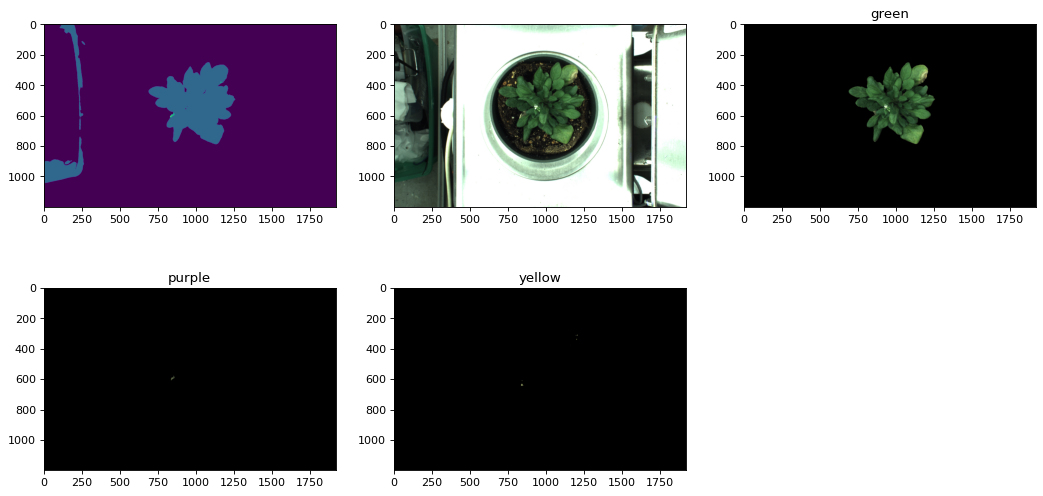

In [46]:
#seg for experiment
exp_path = "/media/lietang/easystore1/RoAD/exp20"
date_file = os.path.join(exp_path, "experiment_date.txt")
dates = open(date_file).read().splitlines()

label_file = os.path.join(exp_path, "experiment_label.txt")
labels = open(label_file).read().splitlines()

fig = plt.figure(figsize=(16, 8), dpi=80)

        
pix_th = 200
# MASK, 0-bg, 38-green, 75-purple, 113-yellow
for label in labels:
#     if label !='WT-1_W_55.91_3':
#         continue
    for date in dates:
#         if date!= '2021-8-16':
#             continue
        img_path = os.path.join(exp_path, date, label, label+".bmp")
        if not os.path.exists(img_path):
            continue

        image = Image.open(img_path).convert('RGB')
        target = Image.open(img_path).convert('L')
        sample = {'image': image, 'label': target}
        tensor_in = composed_transforms(sample)['image'].unsqueeze(0)

        tensor_in = tensor_in.cuda()
        with torch.no_grad():
            output = model(tensor_in)
            
        grid_image = make_grid(decode_seg_map_sequence(torch.max(output[:3], 1)[1].detach().cpu().numpy()),
                                3, normalize=False, range=(0, 255))

        u_time = time.time()
        img_time = u_time-s_time
        print("image:{} time: {} ".format(img_path,img_time))

        save_image(grid_image,"mask2.png")
        mask = Image.open("mask2.png").convert('L')
        mask = np.array(mask)
        print('unique: ', np.unique(mask))
        plt.subplot(2, 3, 1)
        plt.imshow(mask)
        
        img = np.array(image)
        img_purple = np.array(image)
        img_yellow= np.array(image)
#         img[np.where(mask==0)] = [0, 0, 0] #255, 255, 255
        img[np.where(mask!=38)] = [0, 0, 0] 
        img_purple[np.where(mask!=75)] = [0, 0, 0] 
        img_yellow[np.where(mask!=113)] = [0, 0, 0] 
#    
# added on 11122021
        mask[:, :400] = 0
        mask[:, 1600:] = 0
        
        img[:, :400] = 0
        img[:, 1600:] = 0
        img_purple[:, :400] = 0
        img_purple[:, 1600:] = 0
        img_yellow[:, :400] = 0
        img_yellow[:, 1600:] = 0

        import os
        directory = os.path.join(exp_path, '2d_images_deeplab', label, 'processed')
#         print(directory)
        if not os.path.exists(directory):
            os.makedirs(directory)
    
        plt.subplot(2, 3, 2)
        plt.imshow(image)
            
        if (np.count_nonzero(mask==38))>pix_th:
            outpath = os.path.join(directory, label+'_'+date+'_plant.png')
            img = Image.fromarray(img)
            img.save(outpath)
            plt.subplot(2, 3, 3)
            
            plt.gca().set_title('green')
            plt.imshow(img)
            print('plant: ', np.count_nonzero(mask==38))

            
        if (np.count_nonzero(mask==75))>pix_th:
            outpath = os.path.join(directory, label+'_'+date+'_wilted.png')
            img = Image.fromarray(img_purple)
            img.save(outpath)
            plt.subplot(2, 3, 4)
            plt.gca().set_title('purple')
            plt.imshow(img)
            
        if (np.count_nonzero(mask==113))>pix_th:
            outpath = os.path.join(directory, label+'_'+date+'_dry.png')
            img = Image.fromarray(img_yellow)
            img.save(outpath)
            plt.subplot(2, 3, 5)
            plt.gca().set_title('yellow')
            plt.imshow(img)
            
        print(img_path)
#         break
#     break

[[      0 1384955]
 [     38   25403]
 [     75    6690]
 [    113   22952]]


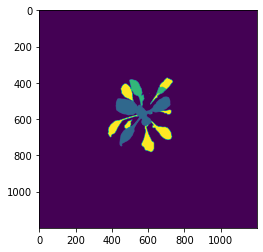

In [303]:
#remove small regions

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import pandas as pd


arr = np.array(mask)
unique, counts = np.unique(arr, return_counts=True)
print(np.asarray((unique, counts)).T)   

plt.imshow(mask)

In [191]:
#https://scikit-image.org/docs/dev/api/skimage.measure.html#regionprops

props = regionprops_table(mask, properties=('area',
                                            'convex_area',
                                            'solidity',
                                            'eccentricity',
                                            'major_axis_length',
                                            'minor_axis_length',
                                            'perimeter',
                                            'bbox_area')
                         )
pd.DataFrame(props)

,area,convex_area,solidity,eccentricity,major_axis_length,minor_axis_length,perimeter,bbox_area
0,60959,123026,0.495497,0.684084,459.342861,335.045992,3102.421715,188328
1,5592,9496,0.588880,0.823480,130.680542,74.141014,358.735065,18048
2,7820,87644,0.089225,0.822942,507.985665,288.599560,996.838708,136822


In [158]:
properties = regionprops(mask.astype(np.uint8))
properties[0]['area']

30844

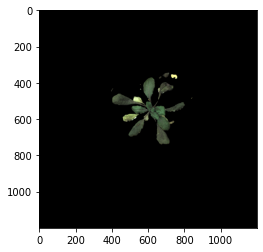

In [159]:
img = np.array(image)
img[np.where(mask==0)] = [0, 0, 0]
plt.imshow(img)

In [160]:
averageR= np.mean( np.nonzero(img[:,:,0]) );
averageG= np.mean( np.nonzero(img[:,:,1]) );
averageB= np.mean( np.nonzero(img[:,:,2]) );

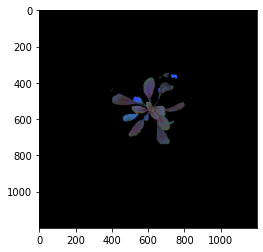

In [161]:
from skimage.color import rgb2hsv

hsv = rgb2hsv(img)

hsvH= np.mean( np.nonzero(hsv[:,:,0]) );
hsvS= np.mean( np.nonzero(hsv[:,:,1]) );
hsvV= np.mean( np.nonzero(hsv[:,:,2]) );

plt.imshow(hsv)

In [162]:
np.unique(mask)

array([  0,  38,  75, 113], dtype=uint8)

val:  0
val:  38
[  0  38  75 113]
val:  75
[  0  38  75 113]
val:  113
[  0  38  75 113]
    area convex_area  solidity  eccentricity  major_axis_length  \
0  60959      123026  0.495497      0.684084         459.342861   
0   5592        9496  0.588880      0.823480         130.680542   
0   7820       87644  0.089225      0.822942         507.985665   

   minor_axis_length    perimeter bbox_area  
0         335.045992  3102.421715    188328  
0          74.141014   358.735065     18048  
0         288.599560   996.838708    136822  


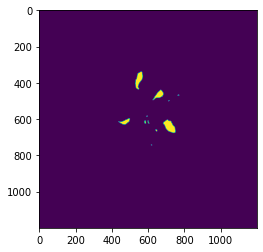

In [190]:
traits = ['area','convex_area','solidity',
          'eccentricity',
          'major_axis_length',
          'minor_axis_length',
          'perimeter',
          'bbox_area']
df = pd.DataFrame( columns = traits)

for val in np.unique(mask):
    print('val: ', val)
    if val ==0:
        continue
    img = np.array(image)
    img.fill(0)
    img[np.where(mask==val)] = [255, 255, 255]
    region = Image.fromarray(img).convert('L')

#     region = mask[np.where(mask==val)]
    plt.imshow(region)
    region = np.array(region)
    props = regionprops_table(region, properties=('area',
                                            'convex_area',
                                            'solidity',
                                            'eccentricity',
                                            'major_axis_length',
                                            'minor_axis_length',
                                            'perimeter',
                                            'bbox_area')
                         )
#     print(pd.DataFrame(props))
    print(np.unique(mask))
    
    df = df.append(pd.DataFrame(props))

print(df)

In [188]:

print(df)

Empty DataFrame
Columns: [area, convex_area, solidity, eccentricity, major_axis_length, minor_axis_length, perimeter, bbox_area]
Index: []
